<a href="https://colab.research.google.com/github/umbutun/hands-on-machine-learning-practice/blob/main/notebooks/chapter_08_unsupervised_learning/chapter_08_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 8 – Unsupervised Learning Techniques**

_This notebook contains all the sample code and solutions to the exercises in chapter 8._

# Setup

This project requires Python 3.10 or above:

In [ ]:
import sys

assert sys.version_info >= (3, 10)

It also requires Scikit-Learn ≥ 1.6.1:

In [ ]:
from packaging.version import Version
import sklearn

assert Version(sklearn.__version__) >= Version("1.6.1")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's  define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [ ]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')


IMAGES_PATH = Path("/content/drive/My Drive/Colab Notebooks/hands-on-ml/ch8-images")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Mounted at /content/drive


# Clustering

**Introduction – Classification _vs_ Clustering**

This cell loads the Iris dataset (`load_iris()`) and then creates two subplots using `matplotlib.pyplot`. The first subplot (`subplot(121)`) displays the three Iris species (setosa, versicolor, virginica) with different markers and colors based on their petal length and width. The second subplot (`subplot(122)`) shows all Iris instances as black dots, simulating an unsupervised learning scenario where class labels are unknown.  

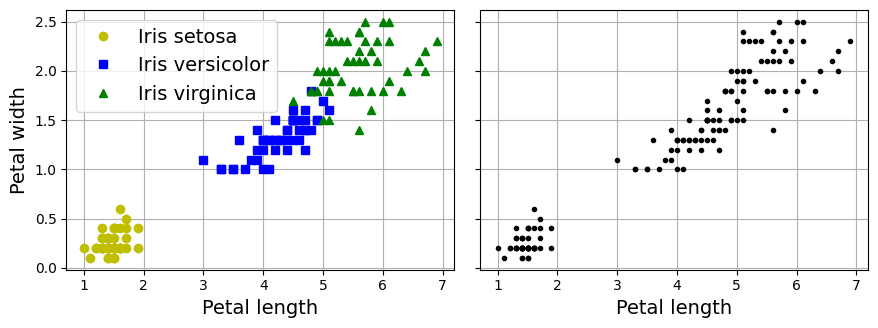

In [ ]:
# extra code – this cell generates Figure 8–1

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()
save_fig("classification_vs_clustering")
plt.show()

**Note**: the next cell shows how a Gaussian mixture model (explained later in this chapter) can actually separate these clusters pretty well using all 4 features: petal length & width, and sepal length & width. This code maps each cluster to a class. Instead of hard coding the mapping, the code picks the most common class for each cluster using the `scipy.stats.mode()` function:

This cell demonstrates how a Gaussian Mixture Model (GMM) can be used for clustering. It trains a GMM with 3 components on the Iris dataset (`X`), then predicts cluster assignments for each instance. It creates a mapping between the GMM's cluster IDs and the actual Iris species (`y`) by finding the most common class within each predicted cluster. Finally, it re-assigns labels based on this mapping and plots the data, visually representing the clusters using petal length and petal width.

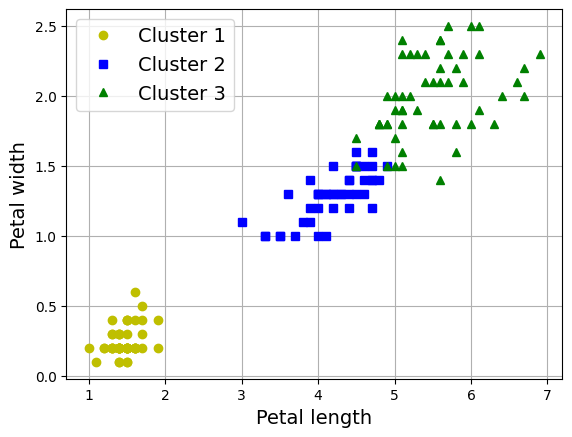

In [ ]:
# extra code

import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode] = class_id

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

What's the ratio of iris plants we assigned to the right cluster?

In [ ]:
(y_pred==y).sum() / len(y_pred)

np.float64(0.9666666666666667)

## K-Means

**Fit and predict**

Let's train a K-Means clusterer on a dataset if blobs. It will try to find each blob's center and assign each instance to the closest blob:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, random_state=43)
y_pred = kmeans.fit_predict(X)

Now let's plot them:

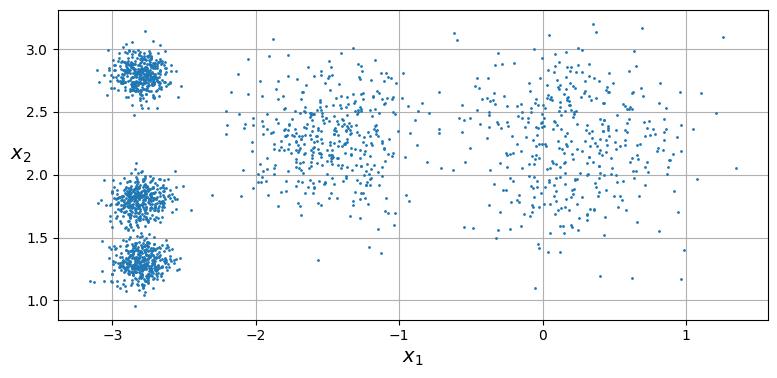

In [ ]:
# extra code – this cell generates Figure 8–2

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
save_fig("blobs_of_data_instances")
plt.show()

Each instance was assigned to one of the 5 clusters:

In [ ]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

And the following 5 _centroids_ (i.e., cluster centers) were estimated:

In [ ]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Note that the `KMeans` instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the _label_ of an instance is the index of the cluster that instance gets assigned to (they are not targets, they are predictions):

In [ ]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

Of course, we can predict the labels of new instances:

In [ ]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

**Decision Boundaries**

Let's plot the model's decision boundaries which gives us a _Voronoi diagram_. This cell defines several helper functions to visualize the K-Means clustering results:

*   `plot_data(X)`: A simple function to plot the individual data points as black dots.
*   `plot_centroids(centroids, weights=None, circle_color='w', cross_color='k')`: This function plots the cluster centroids. It can optionally take `weights` to display only significant centroids and uses different markers (circles and crosses) to make them stand out.
*   `plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True)`: This is the main plotting function. It generates a grid of points within the data's range, predicts the cluster for each point using the provided `clusterer` (K-Means model), and then uses `plt.contourf` to color the regions according to their predicted cluster. This creates a Voronoi diagram. It also draws the decision boundaries, plots the original data points, and optionally plots the centroids.

Finally, the cell uses these functions to create a figure displaying the K-Means decision boundaries for the `kmeans` model trained on dataset `X`, saving the figure as 'k_means_decision_boundaries'.

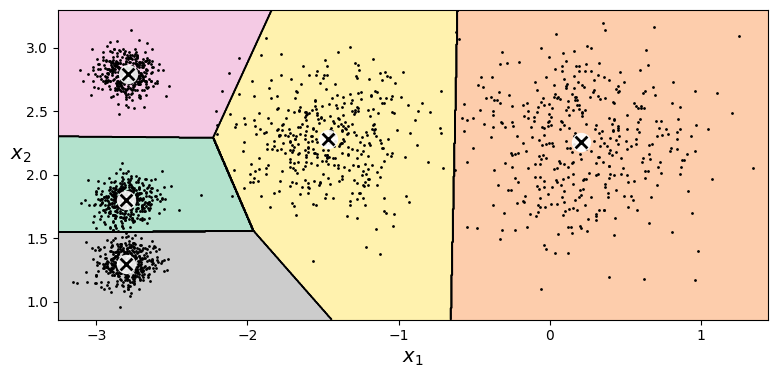

In [ ]:
# extra code – this cell generates Figure 8–3

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("k_means_decision_boundaries")
plt.show()

Not bad! Some of the instances near the edges were probably assigned to the wrong cluster, but overall it looks pretty good.

**Hard Clustering _vs_ Soft Clustering**

Rather than arbitrarily choosing the closest cluster for each instance, which is called _hard clustering_, it might be better to measure the distance of each instance to all 5 centroids. This is what the `transform()` method does:

In [ ]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

You can verify that this is indeed the Euclidian distance between each instance and each centroid:

This code calculates the Euclidean distance between each data point in `X_new` and each of the `k` cluster centroids stored in `kmeans.cluster_centers_`.

Here's a step-by-step explanation:

1.  `np.tile(X_new, (1, k))`: This replicates each row of `X_new` (which contains new data points) `k` times horizontally. If `X_new` has dimensions `(n_samples, n_features)`, this operation results in an array of shape `(n_samples, k * n_features)`.

2.  `.reshape(-1, k, 2)`: This reshapes the tiled array. Since `X_new` has 2 features, `k * n_features` becomes `k * 2`. The reshape operation transforms the array into `(n_samples, k, n_features)`. Now, for each original sample, there are `k` copies of its features, making it ready for element-wise subtraction with each of the `k` centroids.

3.  `- kmeans.cluster_centers_`: This performs an element-wise subtraction. Due to NumPy's broadcasting rules, `kmeans.cluster_centers_` (which has shape `(k, n_features)`) is subtracted from each of the `k` feature-vectors for every sample. The result is an array of shape `(n_samples, k, n_features)`, where each entry `(i, j, :)` represents the difference vector between `X_new[i]` and `kmeans.cluster_centers_[j]`.

4.  `np.linalg.norm(..., axis=2)`: This computes the Euclidean norm (magnitude) of the difference vectors. By setting `axis=2`, the norm is calculated along the feature dimension, effectively giving the Euclidean distance between each data point and each centroid. The output is an array of shape `(n_samples, k)`.

In [ ]:
# extra code
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2)
               - kmeans.cluster_centers_, axis=2).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

### The K-Means Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:
* First initialize $k$ centroids randomly: e.g., $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

The `KMeans` class uses an optimized initialization technique by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"` and `n_init=1`. More on this later in this chapter.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

This cell provides a visual demonstration of the K-Means algorithm's iterative nature. It initializes and trains three `KMeans` models, `kmeans_iter1`, `kmeans_iter2`, and `kmeans_iter3`, with `n_clusters=5` and `init="random"` and `n_init=1` to simulate the original K-Means algorithm's behavior with a single random start. Each model is trained for a different maximum number of iterations (`max_iter` set to 1, 2, and 3 respectively).

The code then generates a 3x2 grid of subplots to visualize the state of the clusters at each iteration:

*   **Left Column (Subplots 321, 323, 325):** These plots show the data points and the centroids' positions after 1, 2, and 3 iterations, respectively. The first subplot specifically highlights the initial random placement and the first update of centroids.
*   **Right Column (Subplots 322, 324, 326):** These plots display the decision boundaries (Voronoi diagrams) and the cluster assignments after 1, 2, and 3 iterations. This visually represents how the instances are labeled based on their proximity to the updated centroids.

This sequence of plots effectively showcases how the K-Means algorithm gradually refines its cluster centroids and instance assignments towards convergence.

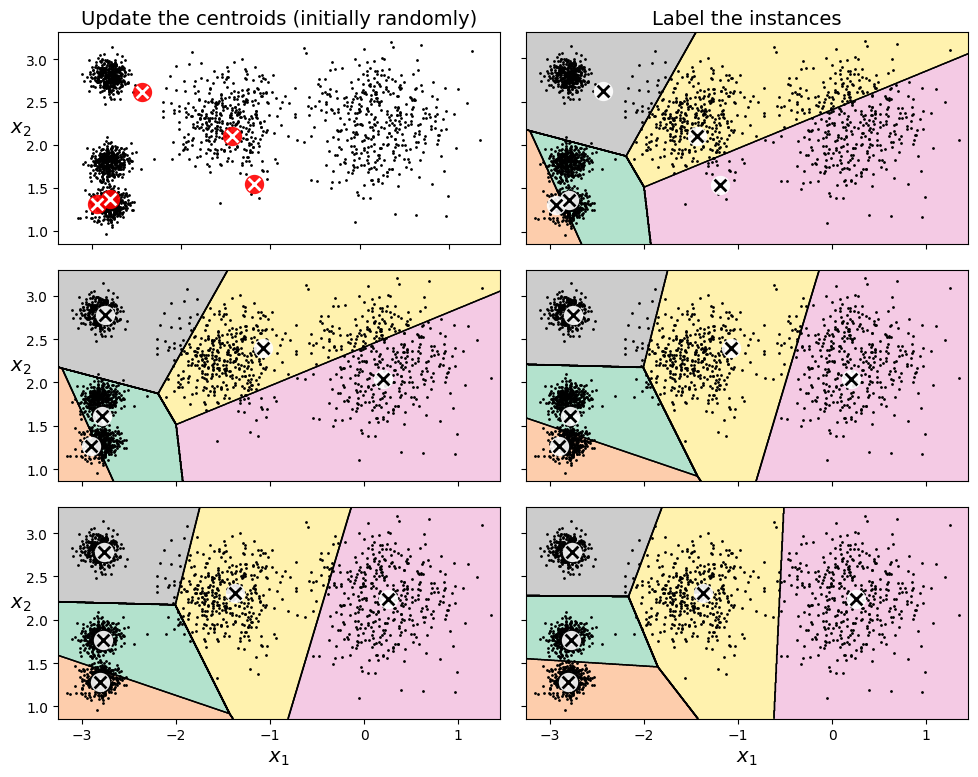

In [ ]:
# extra code – this cell generates Figure 8–4

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=18)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=18)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=18)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("k_means_algorithm")
plt.show()

**K-Means Variability**

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

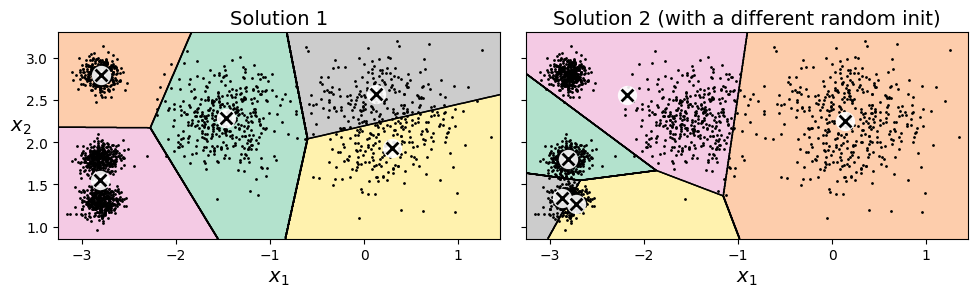

In [ ]:
# extra code – this cell generates Figure 8–5

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=8)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")

save_fig("k_means_unlucky_initialization")
plt.show()

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, random_state=42)

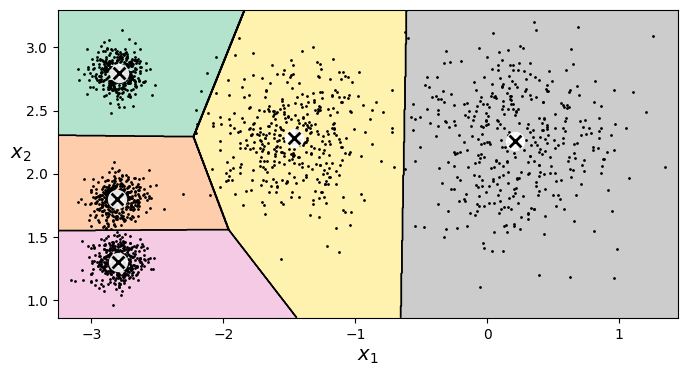

In [ ]:
# extra code
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric. The KMeans class runs the initialization algorithm n_init times and keeps the model with the lowest inertia:

In [ ]:
kmeans.inertia_

211.59853725816828

In [ ]:
kmeans_rnd_init1.inertia_  # extra code

219.58201503602285

In [ ]:
kmeans_rnd_init2.inertia_  # extra code

600.3600713094229

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

This code snippet calculates the inertia of the `kmeans` model, which is a measure of how well the data points are clustered. Inertia is defined as the sum of squared distances of samples to their closest cluster center.

Here's a breakdown:
1.  `X_dist = kmeans.transform(X)`: The `transform()` method of a trained KMeans model calculates the distance from each data point in `X` to *every* cluster centroid. The result `X_dist` will have a shape `(n_samples, n_clusters)`, where `X_dist[i, j]` is the distance of sample `i` to centroid `j`.
2.  `np.arange(len(X_dist))`: This creates an array of indices from 0 to `n_samples - 1`.
3.  `kmeans.labels_`: This attribute of the KMeans model stores the cluster label (index) assigned to each sample in `X`.
4.  `X_dist[np.arange(len(X_dist)), kmeans.labels_]`: This uses advanced indexing to select, for each sample `i`, the distance to its *assigned* cluster center `kmeans.labels_[i]`. So, for each sample, it retrieves only the distance to the cluster it belongs to.
5.  `** 2`: Each of these selected distances is then squared.
6.  `.sum()`: Finally, all the squared distances are summed up, yielding the total inertia of the clustering solution.

In [ ]:
# extra code
X_dist = kmeans.transform(X)
(X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2).sum()

np.float64(211.59853725816882)

The `score()` method returns the negative inertia. Why negative? Well, it is because a predictor's `score()` method must always respect the "_greater is better_" rule.

In [ ]:
kmeans.score(X)

-211.59853725816828

### Multiple Initializations

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia.

Scikit-Learn runs the initialization algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=1` if `init="k-means++"` (which is the default) or if `init` is an array, or it sets `n_init=10` if `init="random"` or `init` is a callable.

In [ ]:
# extra code
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                             random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming $k=5$).

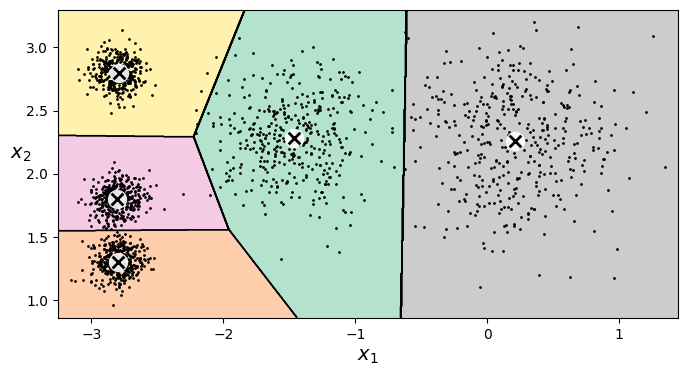

In [ ]:
# extra code
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [ ]:
kmeans_rnd_10_inits.inertia_

211.59853725816828

### Centroid initialization methods

Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a [2006 paper](https://goo.gl/eNUPw6) by David Arthur and Sergei Vassilvitskii (`K Means ++`):
* Take one centroid $c_1$, chosen uniformly at random from the dataset.
* Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
* Repeat the previous step until all $k$ centroids have been chosen.

The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce `n_init` considerably (as mentionned earlier, `n_init` defaults to 1 when using `init=k-means++`. Most of the time, the fact that we can run way less initializations largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set `init="k-means++"` (this is actually the default):

### Accelerated K-Means

The K-Means algorithm can sometimes be accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this [2003 paper](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) by Charles Elkan for more details).

For Elkan's variant of K-Means, use `algorithm="elkan"`. For regular KMeans, use `algorithm="lloyd"` (this is the default).

### Mini-Batch K-Means

Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches (see [this paper](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [ ]:
minibatch_kmeans.inertia_

211.65945105712612

**Using `MiniBatchKMeans` along with `memmap`** (not in the book)

If the dataset does not fit in memory, the simplest option is to use the `memmap` class, just like we did for incremental PCA in the previous chapter. First let's load MNIST:

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

Let's split the dataset:

In [ ]:
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

Next, let's write the training set to a `memmap`:

In [ ]:
filename = "my_mnist.mmap"
X_memmap = np.memmap(filename, dtype='float32', mode='write',
                     shape=X_train.shape)
X_memmap[:] = X_train
X_memmap.flush()

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10,
                                   random_state=42)
minibatch_kmeans.fit(X_memmap)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

### Finding the optimal number of clusters

What if the number of clusters was set to a lower or greater value than 5?

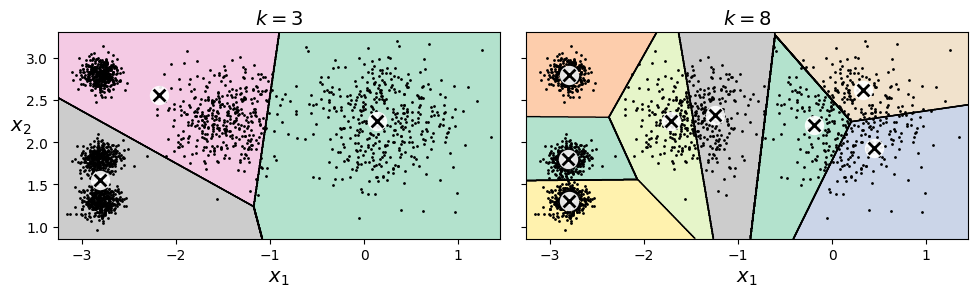

In [ ]:
# extra code – this cell generates Figure 8–6

kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("too_low_and_high_k_selection")
plt.show()

Ouch, these two models don't look great. What about their inertias?

In [ ]:
kmeans_k3.inertia_

653.2167190021554

In [ ]:
kmeans_k8.inertia_

127.13141880461835

No, we cannot simply take the value of $k$ that minimizes the inertia, **since it keeps getting lower as we increase $k$**. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of $k$ and analyze the resulting curve:

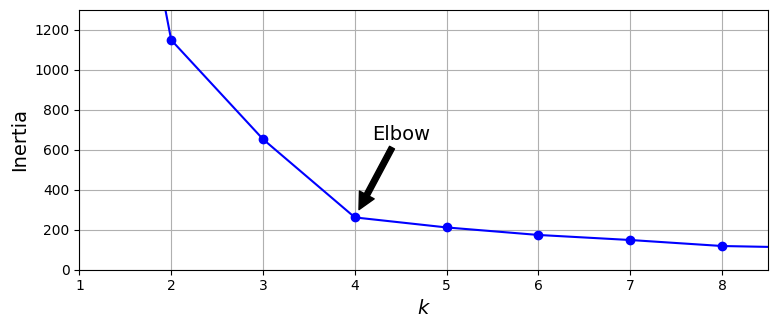

In [ ]:
# extra code – this cell generates Figure 8–8

kmeans_per_k = [KMeans(n_clusters=k, random_state=43).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
save_fig("k_vs_inertia")
plt.show()

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

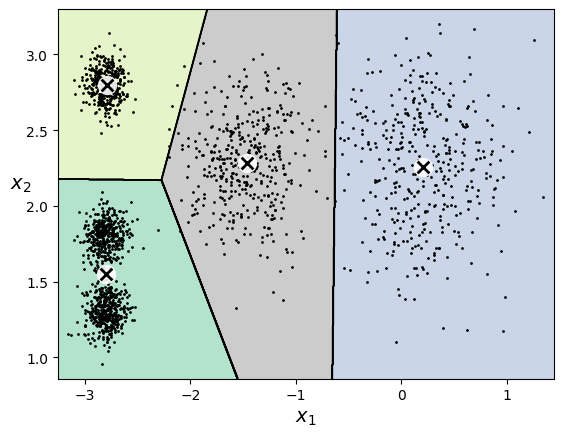

In [ ]:
# extra code
plot_decision_boundaries(kmeans_per_k[4 - 1], X)
plt.show()

Another approach is to look at the _silhouette score_, which is the mean _silhouette coefficient_ over all the instances. An instance's silhouette coefficient is equal to (_b_ - _a_) / max(_a_, _b_) where _a_ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_), and _b_ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes _b_, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Let's plot the silhouette score as a function of $k$:

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, kmeans.labels_)

np.float64(0.655517642572828)

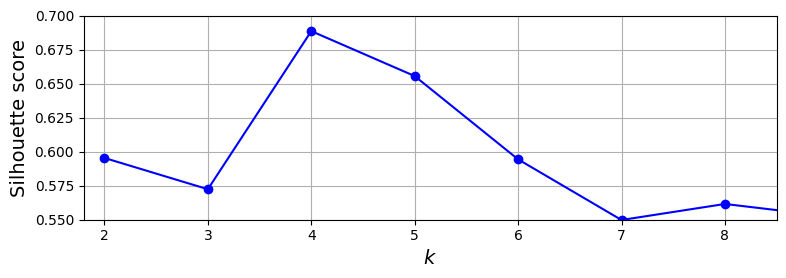

In [ ]:
# extra code – this cell generates Figure 8–9

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
save_fig("k_vs_silhouette_score")
plt.show()

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that $k=4$ is a very good choice, but it also underlines the fact that $k=5$ is quite good as well.

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a _silhouette diagram_:

This cell generates a figure with several silhouette diagrams, one for each `k` in the range (3, 4, 5, 6). A silhouette diagram is a visualization tool used to assess the quality of clustering. For each instance, it plots its silhouette coefficient, sorted within its cluster and by the coefficient's value.

Here's a breakdown of what the code does:
1.  **Iterates through different `k` values**: The loop runs for `k` values of 3, 4, 5, and 6, creating a subplot for each.
2.  **Calculates Silhouette Coefficients**: For each `k`, it retrieves the cluster labels (`y_pred`) from the pre-trained `kmeans_per_k` models and then calculates the `silhouette_samples` for each instance in `X`.
3.  **Plots Silhouette Sections**: For each cluster, it sorts the silhouette coefficients and plots them horizontally as filled areas. The width of each area corresponds to the silhouette coefficient, and different colors are used for different clusters.
4.  **Customizes Y-axis**: The y-axis ticks are set to represent the cluster IDs, positioned at the center of each cluster's silhouette plot.
5.  **Customizes X-axis**: The x-axis represents the silhouette coefficient, ranging from -0.1 to 1.
6.  **Draws Mean Silhouette Score**: A vertical dashed red line is drawn at the average silhouette score for the current `k`, allowing for quick comparison of individual coefficients against the overall performance.
7.  **Titles and Saves**: Each subplot is titled with its corresponding `k` value, and the entire figure is saved as 'silhouette_diagram_for_various_k'.

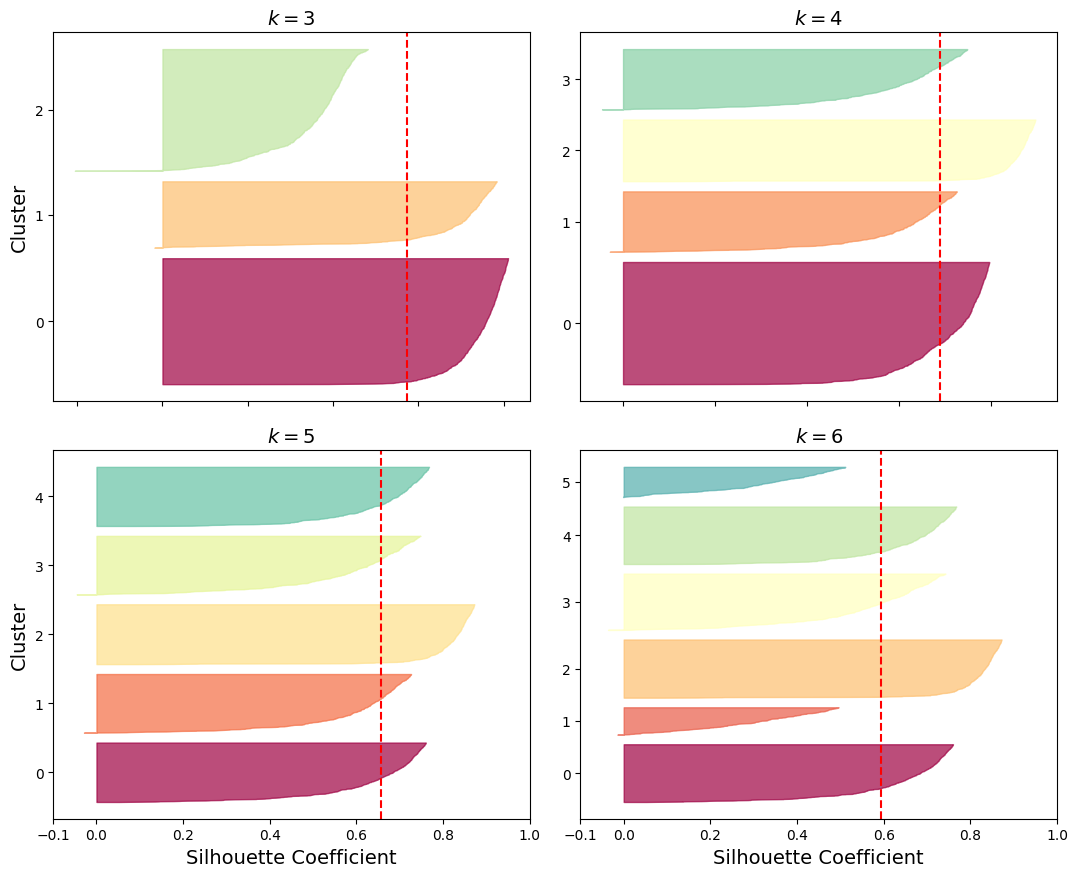

In [ ]:
# extra code – this cell generates Figure 8–10

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

save_fig("silhouette_diagram_for_various_k")
plt.show()

As you can see, $k=5$ looks like the best option here, as all clusters are roughly the same size, and they all cross the dashed line, which represents the mean silhouette score.

## Limits of K-Means

Let's generate a more difficult dataset, with elongated blobs and varying densities, and show that K-Means struggles to cluster it correctly:

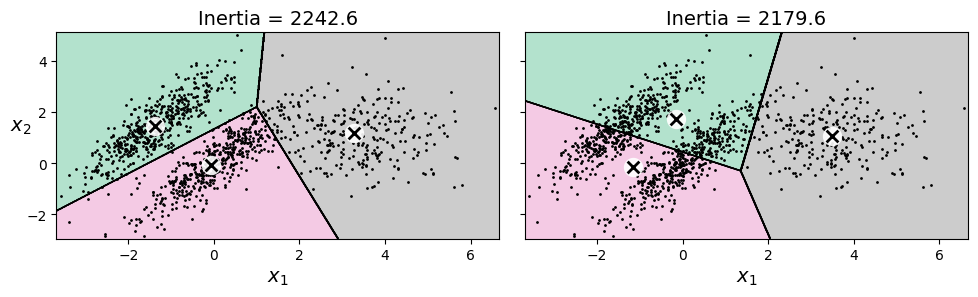

In [ ]:
# extra code – this cell generates Figure 8–11

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}")

save_fig("k_means_fails_to_cluster_ellipsoidal_blobs")
plt.show()

## Using Clustering for Image Segmentation

Download the ladybug image:

In [ ]:
# extra code – downloads the ladybug image
from pathlib import Path
import urllib.request

homlp_root = "https://github.com/ageron/handson-mlp/raw/main/"
filename = "ladybug.png"
filepath = Path(f"my_{filename}")
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homlp_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [ ]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

This cell performs image segmentation using K-Means clustering. Here's a breakdown of the steps:

1.  **`X = image.reshape(-1, 3)`**: The original `image` (which is typically a 3D NumPy array representing height, width, and color channels, e.g., `(height, width, 3)`) is reshaped into a 2D array `X`. The `-1` automatically calculates the number of rows, effectively flattening the image into a list of pixels, where each row `(pixel_idx, :)` represents a single pixel and its three RGB color values. This is done because K-Means expects a 2D array of samples and features.

2.  **`kmeans = KMeans(n_clusters=8, random_state=42).fit(X)`**: A `KMeans` model is initialized with `n_clusters=8` (meaning it will try to find 8 distinct color groups) and `random_state=42` for reproducibility. The model is then `fit` to the reshaped image data `X`, which means it learns the 8 cluster centers (centroids) that best represent the dominant colors in the image.

3.  **`segmented_img = kmeans.cluster_centers_[kmeans.labels_]`**: After fitting, `kmeans.labels_` contains an array indicating which of the 8 clusters each pixel in `X` belongs to. `kmeans.cluster_centers_` is an array of the 8 learned color centroids. By using `kmeans.labels_` as indices into `kmeans.cluster_centers_`, each pixel's original color is replaced with the color of its assigned cluster's centroid. This effectively quantizes the image's colors.

4.  **`segmented_img = segmented_img.reshape(image.shape)`**: Finally, the `segmented_img` (which is currently a 2D array of pixels with their new cluster colors) is reshaped back to the original `image.shape` (height, width, 3). This reconstructs the image, but now with only 8 distinct colors, representing the segmented image.

In [ ]:
X = image.reshape(-1, 3)
print(f"{len(image)=}, {len(image[0])=}, {len(X)=}(800x533), \n {image[:2]=},\n {image[1][1]=} \n {X[:3]=}")

len(image)=533, len(image[0])=800, len(X)=426400(800x533), 
 image[:2]=array([[[ 25,  29,   2],
        [ 24,  28,   1],
        [ 24,  29,   0],
        ...,
        [ 57, 105,  21],
        [ 56, 103,  22],
        [ 52,  99,  19]],

       [[ 24,  28,   1],
        [ 23,  27,   0],
        [ 23,  27,   0],
        ...,
        [ 60, 108,  22],
        [ 59, 106,  25],
        [ 55, 102,  22]]], dtype=uint8),
 image[1][1]=array([23, 27,  0], dtype=uint8) 
 X[:3]=array([[25, 29,  2],
       [24, 28,  1],
       [24, 29,  0]], dtype=uint8)


In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

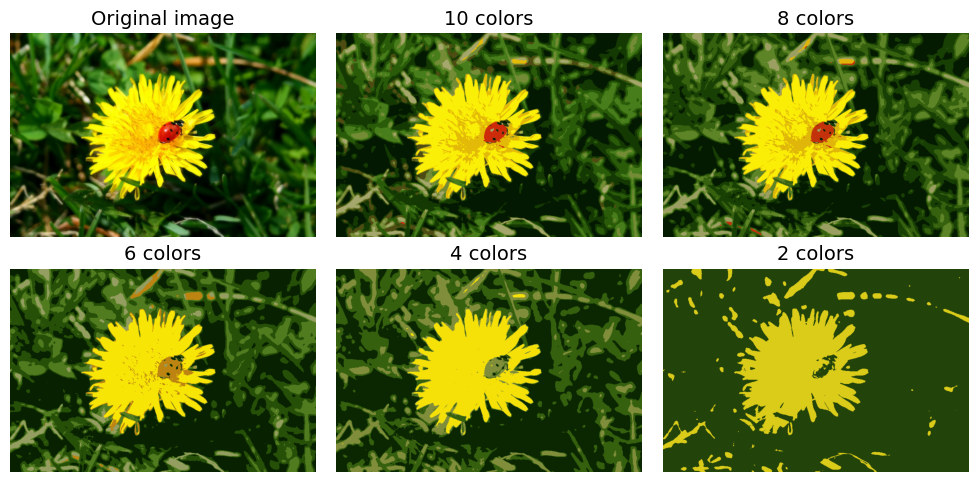

In [ ]:
# extra code – this cell generates Figure 8–12

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

save_fig("image_segmentation_with_kmeans")
plt.show()

## Using Clustering for Semi-Supervised Learning

Another use case for clustering is semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.

Let's tackle the _digits dataset_ which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.

In [ ]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

Let's look at the performance of a logistic regression model when we only have 50 labeled instances:

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [ ]:
# extra code – measure the accuracy when we use the whole training set
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

The performance is much lower when training on just 50 random images. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

This cell demonstrates a technique for selecting representative samples from a larger unlabeled dataset using K-Means clustering, often employed in semi-supervised learning:

1.  **`k = 50`**: Defines the desired number of clusters (and thus, representative samples) to find.
2.  **`kmeans = KMeans(n_clusters=k, random_state=42)`**: Initializes a K-Means model with 50 clusters and a fixed `random_state` for reproducibility.
3.  **`X_digits_dist = kmeans.fit_transform(X_train)`**: This is a crucial step. It first fits the K-Means model to the `X_train` data, learning the cluster centroids. Then, the `transform()` method is immediately called on `X_train`. This method returns, for each instance in `X_train`, its distance to *each* of the 50 cluster centroids. So, `X_digits_dist` will be an array of shape `(n_samples, k)`.
4.  **`representative_digit_idx = X_digits_dist.argmin(axis=0)`**: For each cluster (represented by a column in `X_digits_dist`), `argmin(axis=0)` finds the index of the instance that has the *minimum* distance to that particular cluster's centroid. This effectively identifies the instance closest to the center of each of the 50 clusters. These are considered the 'representative digits'.
5.  **`X_representative_digits = X_train[representative_digit_idx]`**: Finally, this line extracts the actual data points (the image arrays) from `X_train` corresponding to the indices found in the previous step. `X_representative_digits` will now contain 50 images, each being the most representative of its cluster.

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]
print(f"{X_digits_dist.shape=}, {representative_digit_idx.shape=}, {X_representative_digits.shape=}")

X_digits_dist.shape=(1400, 50), representative_digit_idx.shape=(50,), X_representative_digits.shape=(50, 64)


Now let's plot these representative images and label them manually:

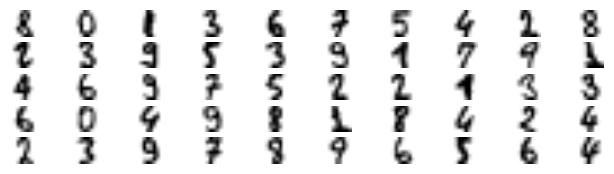

In [ ]:
# extra code – this cell generates Figure 8–13

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')


plt.show()

In [ ]:
y_representative_digits = np.array([
    8, 0, 1, 3, 6, 7, 5, 4, 2, 8,
    2, 3, 9, 5, 3, 9, 1, 7, 9, 1,
    4, 6, 9, 7, 5, 2, 2, 1, 3, 3,
    6, 0, 4, 9, 8, 1, 8, 4, 2, 4,
    2, 3, 9, 7, 8, 9, 6, 5, 6, 4,
])

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8337531486146096

Wow! We jumped from 75.8% accuracy to 83.1%, although we are still only training the model on 50 instances. Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label representative instances rather than just random instances.

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster? This is called `label propagation`.

This cell implements a label propagation step, a technique commonly used in semi-supervised learning. After having identified `k` representative digits (each corresponding to the instance closest to a cluster centroid, and manually labeled), this code propagates these labels to the rest of the training set.

Here's how it works:
1.  **`y_train_propagated = np.empty(len(X_train), dtype=np.int64)`**: An empty NumPy array `y_train_propagated` is initialized. This array will store the propagated labels for the entire training set `X_train`.
2.  **`for i in range(k):`**: The code iterates through each of the `k` clusters.
3.  **`y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]`**: Inside the loop, for each cluster `i`, it selects all instances in `X_train` that were assigned to this cluster (using `kmeans.labels_ == i`). Then, it assigns the label of the `i`-th representative digit (`y_representative_digits[i]`) to all these instances. This effectively 'propagates' the known label of the representative instance to all other unlabeled instances within its cluster.

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.8690176322418136

We got another significant accuracy boost! Let's see if we can do even better by ignoring the 50% instances that are farthest from their cluster center: this should eliminate most outliers:

This code further refines the dataset by selectively keeping only the instances that are considered to be 'closer' to their assigned cluster centers, thus improving the quality of the propagated labels.

Here's a breakdown of the steps:
1.  **`percentile_closest = 50`**: This variable defines the threshold for closeness. Only instances within this percentile of distance to their centroid will be considered for partial propagation.
2.  **`X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]`**: This line retrieves the distance of each training instance `X_train` to *its own assigned cluster centroid*. `X_digits_dist` was previously calculated as the distance of each instance to *all* centroids; here we select only the relevant distance for each instance.
3.  **`for i in range(k): ... X_cluster_dist[in_cluster & above_cutoff] = -1`**: This loop iterates through each of the `k` clusters. For each cluster, it calculates a `cutoff_distance` at the specified `percentile_closest` (e.g., 50th percentile) of distances within that cluster. Any instance in that cluster with a distance *above* this cutoff (meaning it's among the farthest instances in its cluster) has its distance in `X_cluster_dist` marked as `-1`. This effectively flags these instances for exclusion.
4.  **`partially_propagated = (X_cluster_dist != -1)`**: This creates a boolean mask where `True` indicates instances that were *not* flagged (i.e., those that are within the `percentile_closest` to their cluster center).
5.  **`X_train_partially_propagated = X_train[partially_propagated]`** and **`y_train_partially_propagated = y_train_propagated[partially_propagated]`**: Finally, these lines use the boolean mask to filter both the original training data (`X_train`) and the previously propagated labels (`y_train_propagated`), resulting in a new training set (`X_train_partially_propagated`) and corresponding labels (`y_train_partially_propagated`) that contain only the more confidently clustered instances.

In [ ]:
percentile_closest = 50

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8841309823677582

Wow, another accuracy boost!

Our propagated labels are actually pretty good: their accuracy is about 98.9%:

In [ ]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

np.float64(0.9887798036465638)

You could now do a few iterations of *active learning*:
1. Manually label the instances that the classifier is least sure about, if possible by picking them in distinct clusters.
2. Train a new model with these additional labels.

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
print(f" {dbscan.components_=},\n {dbscan.components_.shape=}")

 dbscan.components_=array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]]),
 dbscan.components_.shape=(808, 2)


This cell defines a function `plot_dbscan` to visually represent the results of a DBSCAN clustering. The function distinguishes and plots three types of points:

*   **Core samples**: These are points that have at least `min_samples` neighbors within a distance `eps`.
*   **Anomalies** (or noise points): These are points that are not core samples and are too far from any core sample.
*   **Non-core samples** (or border points): These are points that are not core samples but are within `eps` distance of a core sample.

The `plot_dbscan` function uses different markers and colors to highlight these categories. Core samples are marked with both circles and stars, anomalies with red 'x' marks, and non-core samples with small dots. The function also includes options for customizing labels and titles, showing the `eps` and `min_samples` parameters used by the DBSCAN model.

Finally, the cell demonstrates the use of `plot_dbscan` by:
1.  Training two `DBSCAN` models with different `eps` values (`0.05` and `0.2`) on the dataset `X`.
2.  Creating a figure with two subplots.
3.  Calling `plot_dbscan` for each trained model to visualize their respective clustering outcomes, allowing for a comparison of how the `eps` parameter affects the resulting clusters and noise detection.

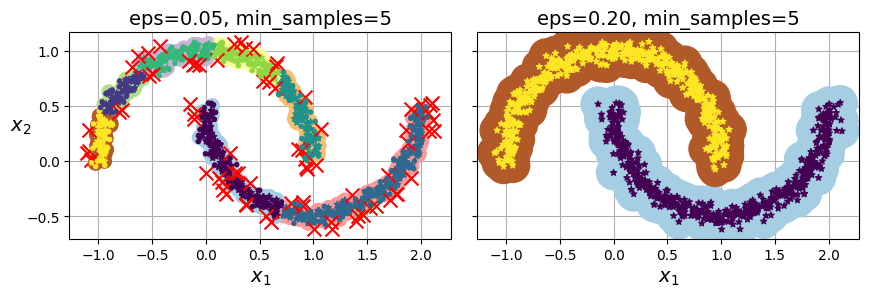

In [ ]:
# extra code – this cell generates Figure 8–14

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("DBSCAN_clustering_with_different_epsilon")
plt.show()

In [ ]:
dbscan = dbscan2  # extra code – the text says we now use eps=0.2

the **DBSCAN** class does not have a `predict()` method, although it has a `fit_predict()` method. In other words, it cannot predict which cluster a new instance belongs to. This decision was made because different classification algorithms can be better for different tasks, so the authors decided to let the user choose which one to use. Moreover, it’s not hard to implement. For example, let’s train a `KNeighborsClassifier`:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [ ]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

Note that we only trained the classifier on the core instances, but we could also have chosen to train it on all the instances, or all but the anomalies: this choice depends on the final task.

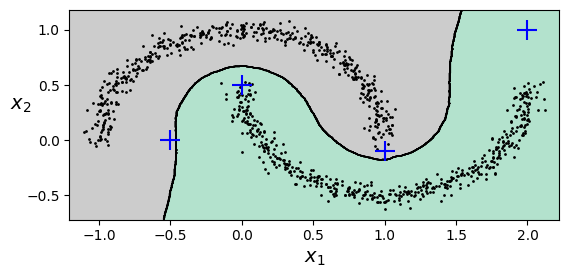

In [ ]:
# extra code – this cell generates Figure 8–14

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("DBSCAN_with_KNeighbors_classifier_decision_boundary")
plt.show()

This code snippet demonstrates a common approach to assign cluster labels to *new* data points after a DBSCAN model has been trained. Since DBSCAN itself doesn't have a `predict()` method, a `KNeighborsClassifier` is often used to extend its clustering capabilities.

Here's a detailed breakdown:

1.  **`y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)`**:
    *   `knn`: This is a `KNeighborsClassifier` instance that was previously trained on DBSCAN's core samples (`dbscan.components_`) and their corresponding cluster labels (`dbscan.labels_[dbscan.core_sample_indices_]`).
    *   `knn.kneighbors(X_new, n_neighbors=1)`: For each instance in the `X_new` array (the new data points you want to label), this method finds the *single closest neighbor* from the set of core samples that `knn` was trained on. It returns two arrays:
        *   `y_dist`: The distances from each `X_new` instance to its closest core sample.
        *   `y_pred_idx`: The indices of these closest core samples *within the `dbscan.core_sample_indices_` array* (i.e., the indices in the training set of `knn`).

2.  **`y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]`**:
    *   This line translates the indices of the closest core samples (`y_pred_idx`) back into their actual DBSCAN cluster labels.
    *   `dbscan.core_sample_indices_`: Contains the original indices of the core samples in the full dataset `X`.
    *   `dbscan.labels_[dbscan.core_sample_indices_]`: Retrieves the cluster labels specifically for the core samples.
    *   `[...] [y_pred_idx]`: Uses the `y_pred_idx` (indices of the closest core samples from `X_new`) to look up the corresponding cluster labels among the core samples' labels. The result `y_pred` is an array of predicted cluster labels for each `X_new` instance.

3.  **`y_pred[y_dist > 0.2] = -1`**:
    *   This step introduces an anomaly detection threshold. If the distance (`y_dist`) between a new instance in `X_new` and its closest core sample is greater than 0.2, that new instance is re-labeled as an anomaly (`-1`). This prevents assigning a new point to a cluster if it's too far from any of the known core samples, even if a closest core sample was technically found by KNN.

4.  **`y_pred.ravel()`**:
    *   This method flattens the `y_pred` array into a one-dimensional array. This is often done for consistency or convenience, as cluster labels are typically represented as a 1D array.

In [ ]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

## Other Clustering Algorithms

The code in this section is bonus material, not in the book.

### Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

This cell initializes and fits a `SpectralClustering` model to the data `X`.

*   **`SpectralClustering`**: This is a clustering algorithm that works by building a similarity graph between data points and then using the eigenvalues of the graph's Laplacian matrix to embed the data into a lower-dimensional space. In this lower-dimensional space, clustering (e.g., using K-Means) is performed.
*   **`n_clusters=2`**: This parameter specifies that the algorithm should attempt to find 2 clusters in the data.
*   **`gamma=100`**: This parameter is used in the Radial Basis Function (RBF) kernel, which is the default kernel for `SpectralClustering`. The `gamma` value influences the 'reach' of the kernel, defining how far the influence of a single data point extends. A higher `gamma` means points must be very close to each other to be considered similar.
*   **`sc1.fit(X)`**: This command trains the `SpectralClustering` model on the input data `X`, which means the algorithm performs the steps of constructing the similarity graph, computing eigenvalues, and clustering to determine the cluster assignments for each data point in `X`.

In [ ]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

This cell accesses and displays the `affinity_matrix_` attribute of the `sc1` (Spectral Clustering) model.

*   **`sc1.affinity_matrix_`**: This is a learned attribute of the `SpectralClustering` model after it has been fitted to the data. It represents the **similarity graph** (also known as the affinity matrix or kernel matrix) that the algorithm constructed from the input data `X`.
    *   Each entry `(i, j)` in this matrix indicates the similarity or affinity between data point `i` and data point `j`. For the default RBF kernel, this similarity is typically high for close points and low for distant points.
    *   The matrix is symmetric, with ones along the diagonal (as each point is perfectly similar to itself).

In [ ]:
sc1.affinity_matrix_.round(2)

array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0.3, ..., 0. , 0. , 0. ],
       [0. , 0.3, 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [ ]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [ ]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True,
                             show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"RBF gamma={sc.gamma}")

This cell generates a figure to visualize the clustering results from two different `SpectralClustering` models, `sc1` and `sc2`. It leverages the `plot_spectral_clustering` function (which would have been defined in a preceding cell) to render the data points with their assigned cluster labels. Here's a breakdown of the visualization:

*   **`plot_spectral_clustering(sc1, X, size=500, alpha=0.1)`**: Calls the custom plotting function to display the clusters found by `sc1`. The `size` and `alpha` parameters control the appearance of the points.
*   **`plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)`**: Calls the plotting function for `sc2`. Notice the different `size` and `alpha` values, suggesting an intention to compare the visual impact of different `gamma` settings on the clustering outcome. `show_ylabels=False` prevents redundant y-axis labels on the second plot.

This setup allows for a direct visual comparison of how variations in `SpectralClustering` parameters (like `gamma`) affect the resulting cluster shapes and assignments.

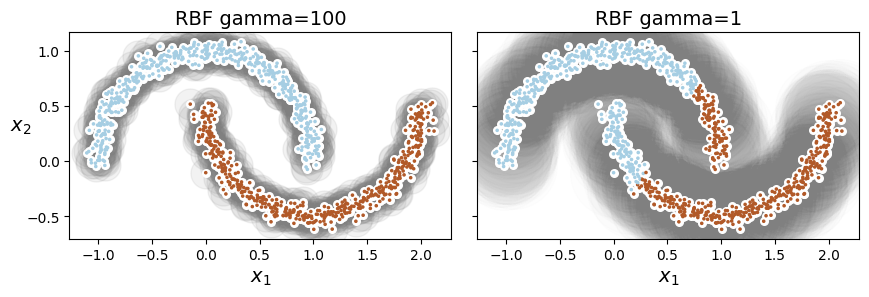

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)
save_fig("spectral_clustering_with_different_gamma")
plt.show()

### Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

This cell initializes and fits an `AgglomerativeClustering` model to a one-dimensional NumPy array `X`.

*   **`X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)`**: This creates a simple dataset `X` containing four data points: 0, 2, 5, and 8.5. The `.reshape(-1, 1)` ensures that `X` is a 2D array, which is the format typically expected by scikit-learn models (each data point is a sample with one feature).

*   **`agg = AgglomerativeClustering(linkage="complete").fit(X)`**:
    *   **`AgglomerativeClustering`**: This is a type of hierarchical clustering algorithm. It builds a hierarchy of clusters by starting with each data point as an individual cluster and then successively merging (agglomerating) pairs of clusters until some criterion is met (e.g., a specified number of clusters or a distance threshold).
    *   **`linkage="complete"`**: This parameter determines which distance measure is used to decide which two clusters to merge. "Complete" linkage (also known as farthest point linkage) considers the maximum distance between observations in any two clusters. The two clusters with the smallest maximum distance between their observations are merged.
    *   **`.fit(X)`**: This method trains the `AgglomerativeClustering` model on the dataset `X`. During fitting, the algorithm determines the cluster hierarchy and assigns each data point to a cluster.

In [ ]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)
X

array([[0. ],
       [2. ],
       [5. ],
       [8.5]])

This cell defines a Python function named `learned_parameters`:

*   **`def learned_parameters(estimator):`**: Defines a function that takes one argument, `estimator`, which is expected to be an instance of a scikit-learn model or a similar object.
*   **`return [attrib for attrib in dir(estimator) if attrib.endswith("_") and not attrib.startswith("_")]`**: This is a list comprehension that generates a list of attribute names based on specific criteria:
    *   **`dir(estimator)`**: This built-in function returns a list of all attributes and methods of the `estimator` object.
    *   **`if attrib.endswith("_")`**: This condition filters the attributes, keeping only those whose names end with an underscore. In scikit-learn, attributes that end with an underscore (e.g., `labels_`, `cluster_centers_`, `n_features_in_`) are typically parameters or learned properties that are set *after* the model has been fitted to data.
    *   **`and not attrib.startswith("_")`**: This additional condition further filters the attributes to exclude those that *also* start with an underscore (e.g., `__init__`, `_predict`). These are usually private or special methods/attributes and are not considered learned parameters.

In essence, this function provides a convenient way to inspect a fitted scikit-learn model and quickly identify the parameters that it has learned from the data.

In [ ]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [ ]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [ ]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

# Gaussian Mixtures

Let's generate the same dataset as earliers with three ellipsoids (the one K-Means had trouble with):

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Let's train a Gaussian mixture model on the previous dataset:

In [ ]:
from sklearn.mixture import GaussianMixture

This cell initializes and fits a `GaussianMixture` model to the dataset `X`.

*   **`GaussianMixture(n_components=3, n_init=10, random_state=42)`**:
    *   **`GaussianMixture`**: This class implements the Expectation-Maximization (EM) algorithm for fitting a mixture of Gaussian models. Unlike K-Means, which assigns each instance to a single cluster, GMMs provide probabilities that an instance belongs to each cluster (soft clustering).
    *   **`n_components=3`**: This parameter specifies the number of Gaussian distributions (clusters) the model should attempt to find in the data. In this context, it's set to 3, anticipating three distinct groups in the `X` dataset.
    *   **`n_init=10`**: The Expectation-Maximization (EM) algorithm, like K-Means, can converge to different local optima depending on the initial parameters. Setting `n_init=10` means the algorithm will be run 10 different times with different random initializations, and the best result (the one with the highest likelihood) will be chosen. This helps in finding a more robust and global optimum.
*   **`gm.fit(X)`**: This method trains the `GaussianMixture` model using the `X` dataset. During this process, the EM algorithm iteratively estimates the parameters for each of the 3 Gaussian components (the mean, covariance matrix, and weight of each component) to best fit the observed data.

In [ ]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

Let's look at the parameters that the EM algorithm estimated:

In [ ]:
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

This cell accesses and displays the `means_` attribute of the `gm` (GaussianMixture) model.

*   **`gm.means_`**: This is a learned attribute of the `GaussianMixture` model after it has been fitted to the data. It's a 2D NumPy array where each row (`gm.means_[i]`) represents the **mean vector** (or centroid) for the *i*-th Gaussian component.

    *   The mean vector defines the **center** of each Gaussian distribution (cluster) in the feature space. For a 2D dataset, each mean vector will have two components, corresponding to the average values of the two features for that cluster.
    *   These means are estimated by the Expectation-Maximization (EM) algorithm during the fitting process, indicating the central tendency of the data points assigned to each cluster.

In [ ]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

This cell accesses and displays the `covariances_` attribute of the `gm` (GaussianMixture) model.

*   **`gm.covariances_`**: This is a learned attribute of the `GaussianMixture` model after it has been fitted to the data. It's a 3D NumPy array where each 2D slice (`gm.covariances_[i]`) represents the **covariance matrix** for the *i*-th Gaussian component.

    *   The covariance matrix describes the **shape, orientation, and scale** of each Gaussian component (i.e., each cluster). For a 2D dataset as used here, each covariance matrix will be a 2x2 matrix.
    *   The diagonal elements of the covariance matrix represent the variance along each feature dimension. The off-diagonal elements represent the covariance between the features.
    *   A diagonal covariance matrix implies that the features are uncorrelated within that cluster, and the cluster has an axis-aligned ellipsoidal shape (or spherical if variances are equal).
    *   A full covariance matrix (like the default here) allows for arbitrary ellipsoidal shapes and orientations, indicating correlation between features within the cluster.

In [ ]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

Unfortunately, just like k-means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution. This is why we set n_init to 10. Be careful: by default n_init is set to 1. Did the algorithm actually converge?

In [ ]:
gm.converged_

True

Yes, good. How many iterations did it take?

In [ ]:
gm.n_iter_

4

You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use `predict()` method or the `predict_proba()` method:

In [ ]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [ ]:
gm.predict_proba(X).round(3)

array([[0.   , 0.023, 0.977],
       [0.001, 0.016, 0.983],
       [1.   , 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]])

This is a generative model, so you can sample new instances from it (and get their labels):

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [ ]:
y_new

array([0, 0, 1, 1, 1, 2])

Notice that they are sampled sequentially from each cluster.

You can also estimate the log of the _probability density function_ (PDF) at any location using the `score_samples()` method:

In [ ]:
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

Let's check that the PDF integrates to 1 over the whole space. We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). The result is very close to 1:

In [ ]:
# extra code – bonus material

resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

np.float64(0.9999999999225088)

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

This cell defines a function `plot_gaussian_mixture` to visualize the clustering results and density estimation from a trained `GaussianMixture` model. It then uses this function to plot the `gm` model.

Here's a breakdown of the `plot_gaussian_mixture` function:

1.  **Grid Creation**: It creates a dense grid of points (`xx`, `yy`) spanning the range of the input data `X`.
2.  **Density Contours (`plt.contourf` and `plt.contour`)**:
    *   `Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])`: It calculates the negative log-likelihood for each point on the grid using `score_samples()`. A lower negative log-likelihood indicates higher density.
    *   This `Z` array is then reshaped to match the grid dimensions.
    *   `plt.contourf` creates filled contours based on the density values, using a `LogNorm` to emphasize differences across a wide range of densities.
    *   `plt.contour` draws the contour lines themselves (in black) over the filled contours, indicating specific density levels.
3.  **Decision Boundaries (`plt.contour`)**:
    *   `Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])`: It predicts the hard cluster assignment for each point on the grid using the `predict()` method.
    *   `plt.contour` then draws dashed red lines to show the boundaries where the model switches its cluster prediction, effectively showing the separation between clusters.
4.  **Data Points and Centroids**: It plots the original data points `X` as small black dots and overlays the cluster centroids (`clusterer.means_`) along with their weights (`clusterer.weights_`) using the previously defined `plot_centroids` function.
5.  **Labels and Title**: It sets the x and y axis labels and handles label visibility based on parameters.

Finally, the cell calls `plot_gaussian_mixture` with the `gm` model and the dataset `X`, and saves the resulting figure as "GMM_cluster_decision_boundaries_density_contours".

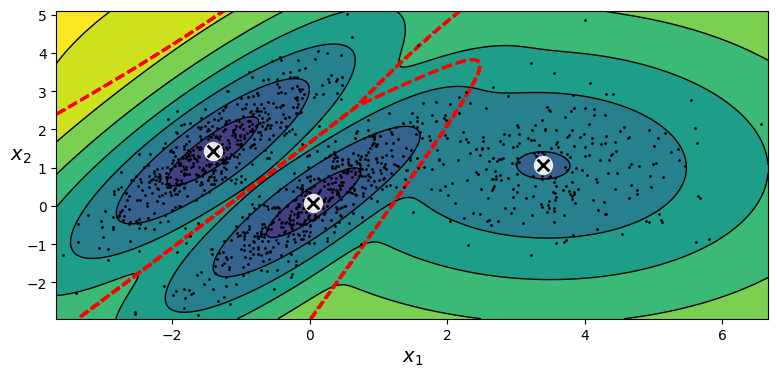

In [ ]:
# extra code – this cell generates Figure 8–16

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("GMM_cluster_decision_boundaries_density_contours")
plt.show()

You can impose constraints on the covariance matrices that the algorithm looks for by setting the `covariance_type` hyperparameter:
* `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances).
* `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).
* `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
* `"full"` (default): no constraint, all clusters can take on any ellipsoidal shape of any size.

This cell trains four `GaussianMixture` models with different `covariance_type` settings and then visually compares two of them. The `covariance_type` parameter controls the geometric properties of the individual Gaussian components within the mixture model.

Here's a breakdown:

*   **Model Training**: Four `GaussianMixture` models are initialized and fitted to the dataset `X`:
    *   `gm_full`: Uses `covariance_type="full"` (default). Each component can have its own arbitrary ellipsoidal shape and orientation.
    *   `gm_tied`: Uses `covariance_type="tied"`. All components share the same arbitrary ellipsoidal covariance matrix.
    *   `gm_spherical`: Uses `covariance_type="spherical"`. Each component is spherical, but can have a different radius (variance).
    *   `gm_diag`: Uses `covariance_type="diag"`. Each component has an ellipsoidal shape aligned with the coordinate axes, and can have different variances along each axis.
    Each model uses `n_components=3`, `n_init=10`, and `random_state=42` for consistent training.

*   **`compare_gaussian_mixtures(gm1, gm2, X)` function**: This helper function takes two fitted Gaussian Mixture models and the dataset `X`. It creates a figure with two subplots and uses the previously defined `plot_gaussian_mixture` function to visualize the decision boundaries and density contours for each model. It also sets the title of each subplot to indicate the `covariance_type` being displayed.

*   **Comparison**: The cell then calls `compare_gaussian_mixtures(gm_tied, gm_spherical, X)` to display a side-by-side comparison of the models with 'tied' and 'spherical' covariance types. This visualization helps illustrate how different constraints on the covariance matrices lead to different clustering results, especially concerning the shape and orientation of the clusters.

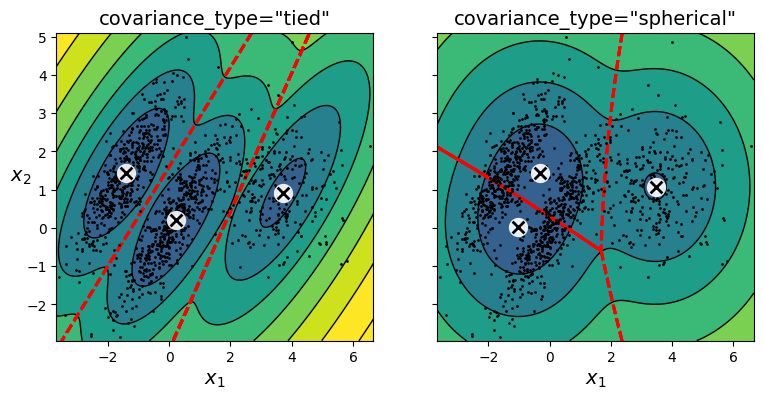

In [ ]:
# extra code – this cell generates Figure 8–17

gm_full = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,
                               covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title(f'covariance_type="{gm1.covariance_type}"')

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title(f'covariance_type="{gm2.covariance_type}"')

compare_gaussian_mixtures(gm_tied, gm_spherical, X)


plt.show()

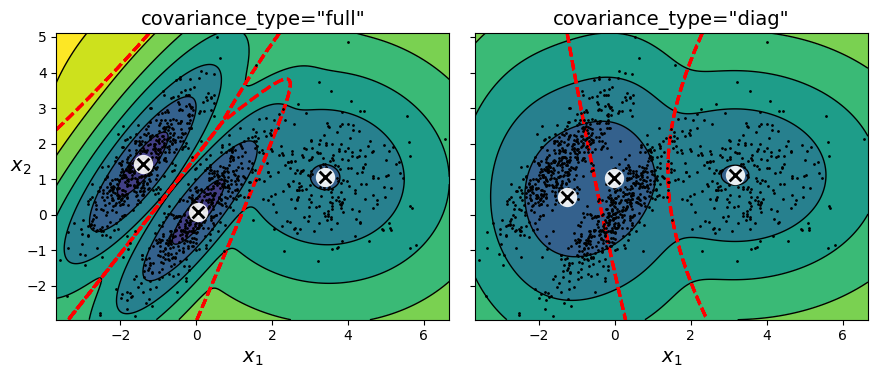

In [ ]:
# extra code – comparing covariance_type="full" and covariance_type="diag"
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

## Anomaly Detection Using Gaussian Mixtures

Gaussian Mixtures can be used for _anomaly detection_: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 2%, then you can set the density threshold to be the value that results in having 2% of the instances located in areas below that threshold density:

This cell applies the trained `GaussianMixture` model (`gm`) to perform anomaly detection. The core idea is that instances located in low-density regions of the data distribution are considered anomalies.

Here's a breakdown of the steps:
1.  **`densities = gm.score_samples(X)`**: The `score_samples()` method of the `GaussianMixture` model calculates the log-likelihood of each sample `X` under the model. A higher log-likelihood means the sample is in a higher-density region, and a lower log-likelihood means it's in a lower-density region.
2.  **`density_threshold = np.percentile(densities, 2)`**: This line calculates a density threshold. It finds the value below which 2% of the `densities` fall. This means that any instance whose density score is below this `density_threshold` will be considered an anomaly, corresponding to the 2% lowest density instances.
3.  **`anomalies = X[densities < density_threshold]`**: This line uses a boolean mask to select all instances from the original dataset `X` whose `densities` score is below the calculated `density_threshold`. These selected instances are then designated as `anomalies`.

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

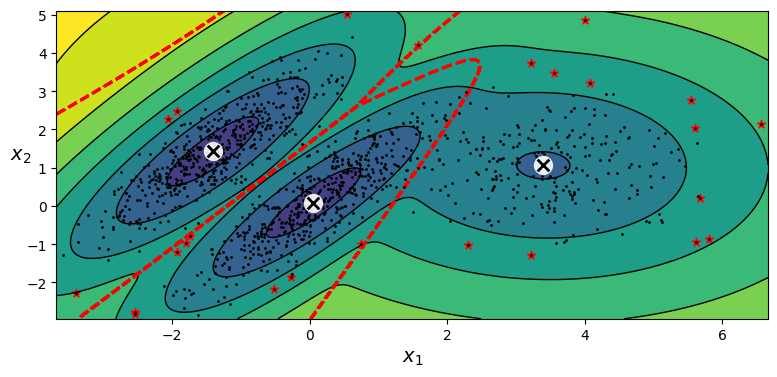

In [ ]:
# extra code – this cell generates Figure 8–18

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("anomaly_detection_using_GMM")
plt.show()

## Selecting the Number of Clusters

We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

This cell generates Figure 8–18, which is a bonus visualization aimed at explaining concepts fundamental to information criteria like BIC and AIC, specifically Maximum Likelihood Estimation (MLE) and Probability Density Functions (PDF).

Here's a breakdown of what the code calculates and plots:

1.  **Synthetic Data and Model (`Z`)**: It creates a synthetic probability distribution `Z` based on a mixture of two normal distributions. This `Z` represents a hypothetical model $f(x; \theta)$ where $x$ is the data point and $\theta$ (represented by `stds` for standard deviation) is a model parameter.

2.  **`x_val` and `std_val`**: These are specific values of a data point (`x`) and a parameter (`\theta` or standard deviation) used to illustrate concepts in the subplots.

3.  **Subplot 1 (Top-Left): Model $f(x; \theta)$**: This subplot shows contours of the PDF $Z$ across a range of $x$ and $\theta$ values. It visualizes how the probability of an observation $x$ changes for different values of the parameter $\theta$.

4.  **Subplot 2 (Top-Right): Likelihood Function $L(\theta|x)$**: This plot shows the likelihood of a specific observed data point (`x_val`) as a function of the parameter $\theta$ (`stds`). The peak of this curve (marked by a red dot) represents the `Maximum Likelihood Estimate` (MLE) for $\theta$, denoted as $\hat{\theta}$, and the corresponding height is the maximized likelihood $\hat{L}$ for that $x_{val}$.

5.  **Subplot 3 (Bottom-Left): PDF $f(x; \theta)$**: This subplot displays the probability density function for a fixed parameter $\theta$ (`std_val`) across a range of $x$ values. The shaded area typically represents the probability of $x$ falling within a certain range.

6.  **Subplot 4 (Bottom-Right): Log-Likelihood Function $\log L(\theta|x)$**: Similar to the likelihood function, this plot shows the logarithm of the likelihood for `x_val` as a function of $\theta$. The peak of the log-likelihood function occurs at the same $\hat{\theta}$ as the likelihood function itself, but working with log-likelihoods often simplifies calculations (especially in criteria like AIC and BIC).

In essence, this cell provides a visual foundation for understanding how models are fitted by maximizing likelihood and how model complexity (through parameters) is related to that likelihood.

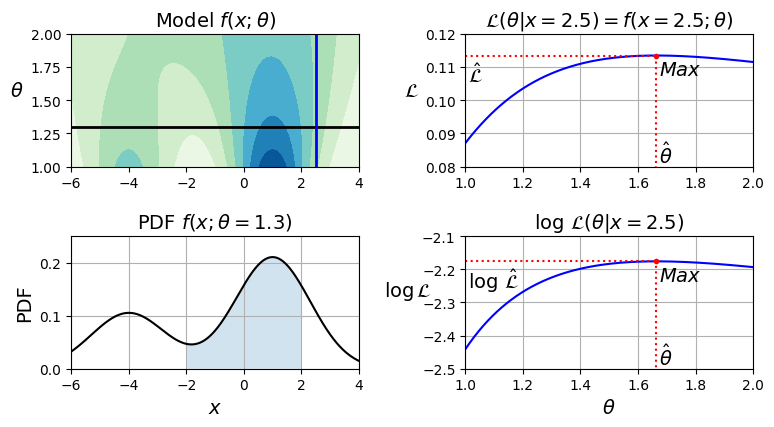

In [ ]:
# extra code – this cell generates Figure 8–18

from scipy.stats import norm

x_val = 2.5
std_val = 1.3
x_range = [-6, 4]
x_proba_range = [-2, 2]
stds_range = [1, 2]

xs = np.linspace(x_range[0], x_range[1], 501)
stds = np.linspace(stds_range[0], stds_range[1], 501)
Xs, Stds = np.meshgrid(xs, stds)
Z = 2 * norm.pdf(Xs - 1.0, 0, Stds) + norm.pdf(Xs + 4.0, 0, Stds)
Z = Z / Z.sum(axis=1)[:, np.newaxis] / (xs[1] - xs[0])

x_example_idx = (xs >= x_val).argmax()  # index of the first value >= x_val
max_idx = Z[:, x_example_idx].argmax()
max_val = Z[:, x_example_idx].max()
s_example_idx = (stds >= std_val).argmax()
x_range_min_idx = (xs >= x_proba_range[0]).argmax()
x_range_max_idx = (xs >= x_proba_range[1]).argmax()
log_max_idx = np.log(Z[:, x_example_idx]).argmax()
log_max_val = np.log(Z[:, x_example_idx]).max()

plt.figure(figsize=(8, 4.5))

plt.subplot(2, 2, 1)
plt.contourf(Xs, Stds, Z, cmap="GnBu")
plt.plot([-6, 4], [std_val, std_val], "k-", linewidth=2)
plt.plot([x_val, x_val], [1, 2], "b-", linewidth=2)
plt.ylabel(r"$\theta$", rotation=0, labelpad=10)
plt.title(r"Model $f(x; \theta)$")

plt.subplot(2, 2, 2)
plt.plot(stds, Z[:, x_example_idx], "b-")
plt.plot(stds[max_idx], max_val, "r.")
plt.plot([stds[max_idx], stds[max_idx]], [0, max_val], "r:")
plt.plot([0, stds[max_idx]], [max_val, max_val], "r:")
plt.text(stds[max_idx]+ 0.01, 0.081, r"$\hat{\theta}$")
plt.text(stds[max_idx]+ 0.01, max_val - 0.006, r"$Max$")
plt.text(1.01, max_val - 0.008, r"$\hat{\mathcal{L}}$")
plt.ylabel(r"$\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\mathcal{{L}}(\theta|x={x_val}) = f(x={x_val}; \theta)$")
plt.grid()
plt.axis([1, 2, 0.08, 0.12])

plt.subplot(2, 2, 3)
plt.plot(xs, Z[s_example_idx], "k-")
plt.fill_between(xs[x_range_min_idx:x_range_max_idx+1],
                 Z[s_example_idx, x_range_min_idx:x_range_max_idx+1], alpha=0.2)
plt.xlabel(r"$x$")
plt.ylabel("PDF")
plt.title(fr"PDF $f(x; \theta={std_val})$")
plt.grid()
plt.axis([-6, 4, 0, 0.25])

plt.subplot(2, 2, 4)
plt.plot(stds, np.log(Z[:, x_example_idx]), "b-")
plt.plot(stds[log_max_idx], log_max_val, "r.")
plt.plot([stds[log_max_idx], stds[log_max_idx]], [-5, log_max_val], "r:")
plt.plot([0, stds[log_max_idx]], [log_max_val, log_max_val], "r:")
plt.text(stds[log_max_idx]+ 0.01, log_max_val - 0.06, r"$Max$")
plt.text(stds[log_max_idx]+ 0.01, -2.49, r"$\hat{\theta}$")
plt.text(1.01, log_max_val - 0.08, r"$\log \, \hat{\mathcal{L}}$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\log\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\log \, \mathcal{{L}}(\theta|x={x_val})$")
plt.grid()
plt.axis([1, 2, -2.5, -2.1])

save_fig("model_f(x;𝜃)_likelihood_and_pdf")
plt.show()

In [ ]:
gm.bic(X)

np.float64(8189.733705221636)

In [ ]:
gm.aic(X)

np.float64(8102.508425106598)

We could compute the BIC manually like this:

This cell calculates the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) manually, demonstrating the formulas used by `GaussianMixture` models. These criteria help in selecting the optimal number of clusters for a model by balancing model fit and complexity. Here's a breakdown of the calculations:

*   **`n_clusters = 3`**: The number of clusters used in the `GaussianMixture` model.
*   **`n_dims = 2`**: The number of dimensions (features) in the dataset `X`.
*   **`n_params_for_weights = n_clusters - 1`**: Calculates the number of independent parameters for the cluster weights. Since the sum of weights must equal 1, there is one less degree of freedom than the number of clusters.
*   **`n_params_for_means = n_clusters * n_dims`**: Calculates the number of parameters for the means. Each cluster has a mean vector, and each mean vector has `n_dims` components.
*   **`n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2`**: Calculates the number of parameters for the covariance matrices. For a 'full' covariance type (which is the default and assumed here), an `n_dims` by `n_dims` symmetric covariance matrix has `n_dims * (n_dims + 1) / 2` unique parameters. This is multiplied by `n_clusters` for each cluster's covariance matrix.
*   **`n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance`**: The total number of parameters learned by the model.
*   **`max_log_likelihood = gm.score(X) * len(X)`**: The `score(X)` method of `GaussianMixture` returns the average log-likelihood of the samples. Multiplying by `len(X)` gives the total log-likelihood, denoted as $\log(\hat{L})$ in the BIC/AIC formulas.
*   **`bic = np.log(len(X)) * n_params - 2 * max_log_likelihood`**: The formula for the Bayesian Information Criterion.
*   **`aic = 2 * n_params - 2 * max_log_likelihood`**: The formula for the Akaike Information Criterion.

Finally, the calculated `bic`, `aic`, and `n_params` values are printed.

In [ ]:
# extra code – bonus material
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(f"bic = {bic}")
print(f"aic = {aic}")
print(f"n_params = {n_params}")

bic = 8189.733705221636
aic = 8102.508425106598
n_params = 17


There's one weight per cluster, but the sum must be equal to 1, so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $n \times n$ covariance matrix is not $n^2$, but $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.

Let's train Gaussian Mixture models with various values of $k$ and measure their BIC:

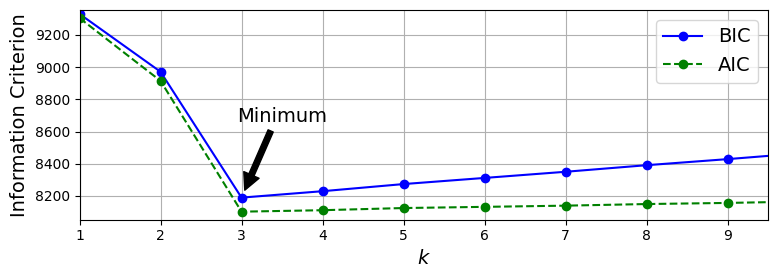

In [ ]:
# extra code – this cell generates Figure 8–19

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "Minimum", horizontalalignment="center")
plt.legend()
plt.grid()
save_fig("AIC_and_BIC_vs_k")
plt.show()

## Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, it is possible to use instead the `BayesianGaussianMixture` class which is capable of giving weights equal (or close) to zero to unnecessary clusters. Just set the number of components to a value that you believe is greater than the optimal number of clusters, and the algorithm will eliminate the unnecessary clusters automatically.

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, max_iter=500,
                              random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.4 , 0.21, 0.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

The algorithm automatically detected that only 3 components are needed!

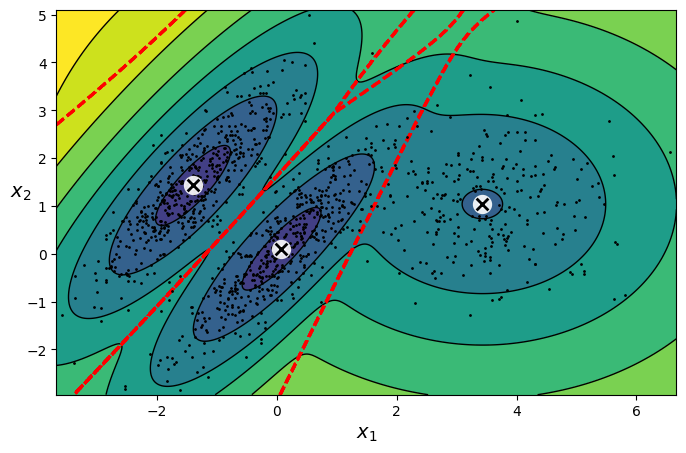

In [ ]:
# extra code – this figure is almost identical to Figure 8–16
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

This cell generates a figure demonstrating the application of a `BayesianGaussianMixture` model to a dataset with a non-ellipsoidal structure (the "moons" dataset). Here's a breakdown of the code:

1.  **`X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)`**: This line generates a synthetic 2D dataset using `make_moons` from `sklearn.datasets`. This dataset consists of two interleaving half-circle (moon-shaped) clusters, which are challenging for algorithms that assume convex or ellipsoidal cluster shapes.
    *   `n_samples=1000`: Creates 1000 data points.
    *   `noise=0.05`: Adds a small amount of Gaussian noise to the data points.
    *   `random_state=42`: Ensures reproducibility of the dataset generation.

2.  **`bgm = BayesianGaussianMixture(n_components=10, n_init=10, max_iter=500, random_state=42)`**: A `BayesianGaussianMixture` model is initialized.
    *   `n_components=10`: The model is instructed to consider up to 10 potential Gaussian components. A key feature of Bayesian GMMs is their ability to automatically prune unnecessary components by setting their weights to (or close to) zero.
    *   `n_init=10`: The EM algorithm is run 10 times with different initializations, and the best result (highest likelihood) is chosen.
    *   `max_iter=500`: Sets the maximum number of iterations for the EM algorithm.
    *   `random_state=42`: Ensures reproducibility.

3.  **`bgm.fit(X_moons)`**: The Bayesian Gaussian Mixture model is fitted to the generated moons dataset, learning the parameters (means, covariances, and weights) of the Gaussian components.

This example highlights that while GMMs are effective for ellipsoidal clusters, fitting them to complex, non-ellipsoidal shapes often results in the use of multiple Gaussian components to approximate the true underlying distribution, rather than identifying the non-ellipsoidal shapes directly as single clusters.

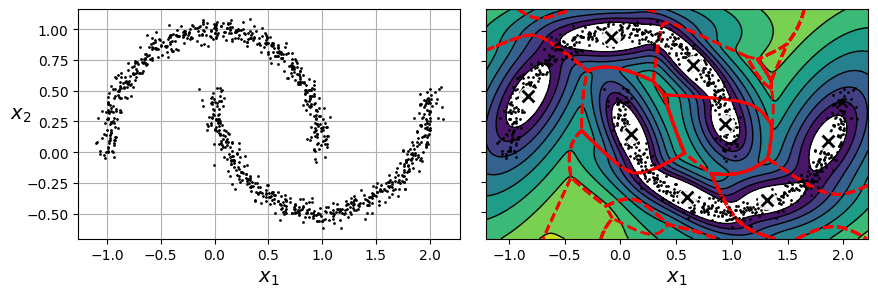

In [ ]:
# extra code – this cell generates Figure 8–20

X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

bgm = BayesianGaussianMixture(n_components=10, n_init=10, max_iter=500, random_state=42)
bgm.fit(X_moons)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.grid()

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

save_fig("fitting_GM_to_nonellipsoidal_clusters")
plt.show()

Oops, not great... instead of detecting 2 moon-shaped clusters, the algorithm detected 8 ellipsoidal clusters. However, the density plot does not look too bad, so it might be usable for anomaly detection.

# Exercise solutions

## 1. to 9.

1. In Machine Learning, clustering is the unsupervised task of grouping similar instances together. The notion of similarity depends on the task at hand: for example, in some cases two nearby instances will be considered similar, while in others similar instances may be far apart as long as they belong to the same densely packed group. Popular clustering algorithms include K-Means, DBSCAN, agglomerative clustering, BIRCH, Mean-Shift, affinity propagation, and spectral :.
2. The main applications of clustering algorithms include data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, anomaly detection, and novelty detection.
3. The elbow rule is a simple technique to select the number of clusters when using K-Means: just plot the inertia (the mean squared distance from each instance to its nearest centroid) as a function of the number of clusters, and find the point in the curve where the inertia stops dropping fast (the "elbow"). This is generally close to the optimal number of clusters. Another approach is to plot the silhouette score as a function of the number of clusters. There will often be a peak, and the optimal number of clusters is generally nearby. The silhouette score is the mean silhouette coefficient over all instances. This coefficient varies from +1 for instances that are well inside their cluster and far from other clusters, to –1 for instances that are very close to another cluster. You may also plot the silhouette diagrams and perform a more thorough analysis.
4. Labeling a dataset is costly and time-consuming. Therefore, it is common to have plenty of unlabeled instances, but few labeled instances. Label propagation is a technique that consists in copying some (or all) of the labels from the labeled instances to similar unlabeled instances. This can greatly extend the number of labeled instances, and thereby allow a supervised algorithm to reach better performance (this is a form of semi-supervised learning). One approach is to use a clustering algorithm such as K-Means on all the instances, then for each cluster find the most common label or the label of the most representative instance (i.e., the one closest to the centroid) and propagate it to the unlabeled instances in the same cluster.
5. K-Means and BIRCH scale well to large datasets. DBSCAN and Mean-Shift look for regions of high density.
6. Active learning is useful whenever you have plenty of unlabeled instances but labeling is costly. In this case (which is very common), rather than randomly selecting instances to label, it is often preferable to perform active learning, where human experts interact with the learning algorithm, providing labels for specific instances when the algorithm requests them. A common approach is uncertainty sampling (see the _Active Learning_ section in chapter 8).
7. Many people use the terms _anomaly detection_ and _novelty detection_ interchangeably, but they are not exactly the same. In anomaly detection, the algorithm is trained on a dataset that may contain outliers, and the goal is typically to identify these outliers (within the training set), as well as outliers among new instances. In novelty detection, the algorithm is trained on a dataset that is presumed to be "clean," and the objective is to detect novelties strictly among new instances. Some algorithms work best for anomaly detection (e.g., Isolation Forest), while others are better suited for novelty detection (e.g., one-class SVM).
8. A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. In other words, the assumption is that the data is grouped into a finite number of clusters, each with an ellipsoidal shape (but the clusters may have different ellipsoidal shapes, sizes, orientations, and densities), and we don't know which cluster each instance belongs to. This model is useful for density estimation, clustering, and anomaly detection.
9. One way to find the right number of clusters when using a Gaussian mixture model is to plot the Bayesian information criterion (BIC) or the Akaike information criterion (AIC) as a function of the number of clusters, then choose the number of clusters that minimizes the BIC or AIC. Another technique is to use a Bayesian Gaussian mixture model, which automatically selects the number of clusters.

## 10. Cluster the Olivetti Faces Dataset

*Exercise: The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function.*

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

This cell accesses and displays the `target` attribute of the `olivetti` dataset object.

*   **`olivetti.target`**: This is an attribute common to scikit-learn datasets. It typically holds the class labels or target values for each data instance. In the case of the Olivetti Faces dataset, `olivetti.target` is a NumPy array where each value corresponds to the identity of the person shown in the respective face image. Since there are 40 different people, the labels range from 0 to 39.

So, `olivetti.target` provides the ground truth labels, indicating which of the 40 individuals each of the 400 images represents.

In [ ]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

*Exercise: Then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set.*

This cell divides the Olivetti Faces dataset into three subsets: a training set, a validation set, and a test set, using a technique called **stratified sampling**. Stratified sampling is important here because the dataset is relatively small (400 images for 40 people, meaning 10 images per person), and it ensures that each subset contains a proportional representation of each person.

Here's a breakdown of the steps:

1.  **First Split (Training+Validation vs. Test)**:
    *   `strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)`: An instance of `StratifiedShuffleSplit` is created. It will perform one split (`n_splits=1`), reserving 40 samples for the test set (`test_size=40`). The `random_state` ensures reproducibility.
    *   `train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))`: This performs the split. `olivetti.data` contains the image data (features), and `olivetti.target` contains the labels (person IDs). The `next()` function is used because `split` returns an iterator. `train_valid_idx` gets the indices for the combined training and validation set, and `test_idx` gets the indices for the test set.
    *   `X_train_valid = olivetti.data[train_valid_idx]`: Extracts the feature data for the training and validation set.
    *   `y_train_valid = olivetti.target[train_valid_idx]`: Extracts the corresponding labels for the training and validation set.
    *   `X_test = olivetti.data[test_idx]`: Extracts the feature data for the final test set.
    *   `y_test = olivetti.target[test_idx]`: Extracts the corresponding labels for the final test set.

2.  **Second Split (Training vs. Validation)**:
    *   `strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)`: Another `StratifiedShuffleSplit` instance is created, this time to split the `X_train_valid` data. It reserves 80 samples for the validation set (`test_size=80`). A different `random_state` (`43`) is used to ensure a different split from the first one.
    *   `train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))`: This performs the split on the `X_train_valid` and `y_train_valid` subsets.
    *   `X_train = X_train_valid[train_idx]`: Extracts the feature data for the final training set.
    *   `y_train = y_train_valid[train_idx]`: Extracts the corresponding labels for the final training set.
    *   `X_valid = X_train_valid[valid_idx]`: Extracts the feature data for the final validation set.
    *   `y_valid = y_train_valid[valid_idx]`: Extracts the corresponding labels for the final validation set.

This two-step process ensures that you have a dedicated test set for final model evaluation and a separate validation set for hyperparameter tuning, all while maintaining class proportions.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [ ]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


To speed things up, we'll reduce the data's dimensionality using PCA:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

np.int64(199)

*Exercise: Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter).*

In [ ]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print(f"k={k}")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


This cell calculates and visualizes the silhouette score for different numbers of clusters (`k`) to help determine the optimal `k` for K-Means clustering.

1.  **Calculate Silhouette Scores**: It iterates through a range of `KMeans` models (presumably trained with different `k` values, stored in `kmeans_per_k`) and computes the `silhouette_score` for each model using the PCA-transformed training data (`X_train_pca`) and the cluster labels assigned by the model (`model.labels_`).
2.  **Identify Best `k`**: It finds the `k` value (`best_k`) that corresponds to the maximum `silhouette_score`.
3.  **Visualize Results**: It then plots these silhouette scores against the corresponding `k` values, creating a line plot. The `best_k` and its score are highlighted with a red square. This visualization helps to identify the `k` that yields the most compact and well-separated clusters, typically indicated by the highest silhouette score.

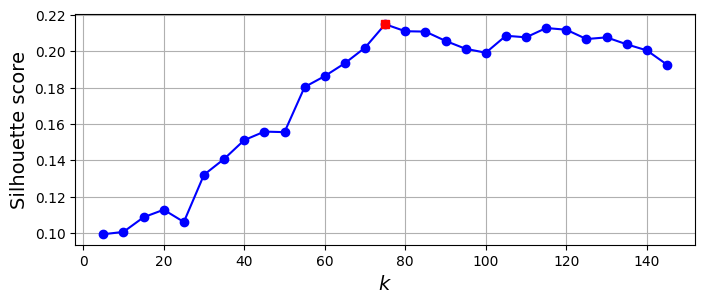

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

In [ ]:
best_k

75

It looks like the best number of clusters is quite high, at 120. You might have expected it to be 40, since there are 40 different people on the pictures. However, the same person may look quite different on different pictures (e.g., with or without glasses, or simply shifted left or right).

This cell calculates and visualizes the **inertia** for different numbers of clusters (`k`), which is a metric used to evaluate K-Means clustering.

1.  **Calculate Inertias**: It iterates through the pre-trained `KMeans` models (stored in `kmeans_per_k`) and retrieves the `inertia_` for each model. Inertia represents the sum of squared distances of samples to their closest cluster center. A lower inertia typically indicates better clustering.
2.  **Highlight Best `k`**: It then marks the `best_k` (which was previously determined using the silhouette score) and its corresponding inertia on the plot, allowing for comparison between the two metrics.
3.  **Visualize Results**: The inertia values are plotted against the `k` values. This visualization is often used in the "elbow method" to find an optimal `k` by looking for a point where the decrease in inertia starts to slow down significantly, resembling an elbow. However, as noted in the notebook, an obvious elbow is not always present.

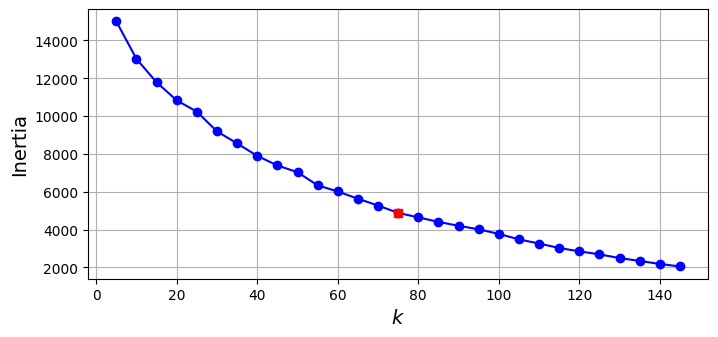

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

The optimal number of clusters is not clear on this inertia diagram, as there is no obvious elbow, so let's stick with k=120.

In [ ]:
best_model = kmeans_per_k[best_index]

*Exercise: Visualize the clusters: do you see similar faces in each cluster?*

This cell defines a function `plot_faces` and then uses it to visualize the images (faces) grouped by the clusters identified by the `best_model` (a K-Means model).

1.  **`def plot_faces(faces, labels, n_cols=5):`**: This function is designed to display a grid of faces.
    *   It reshapes the input `faces` (which are flattened 1D vectors) back into 64x64 pixel images.
    *   It calculates the number of rows needed based on the number of faces and the desired `n_cols`.
    *   It creates a `matplotlib` figure and then iterates through each `face` and its corresponding `label`.
    *   For each face, it creates a subplot, displays the image in grayscale (`cmap="gray"`), hides the axes (`axis("off")`), and sets the subplot's title to the given `label`.

2.  **`for cluster_id in np.unique(best_model.labels_): ...`**: This loop iterates through each unique cluster ID found by the `best_model` (which was trained on the PCA-reduced Olivetti Faces dataset).
    *   For each `cluster_id`, it identifies all faces (`X_train`) and their original labels (`y_train`) that belong to that specific cluster.
    *   Finally, it calls the `plot_faces` function to display all the faces within that cluster, titled with their original person ID. This visualization helps to assess whether the K-Means algorithm successfully grouped images of the same person together.

Cluster 0


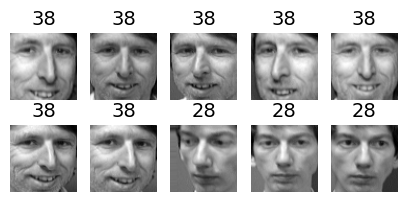

Cluster 1


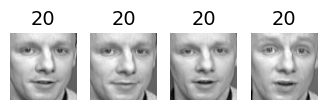

Cluster 2


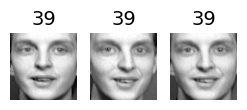

Cluster 3


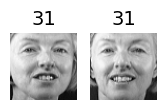

Cluster 4


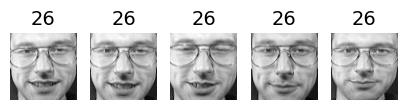

Cluster 5


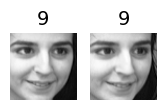

Cluster 6


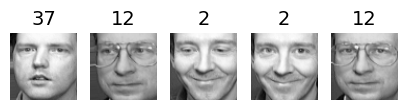

Cluster 7


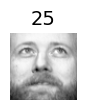

Cluster 8


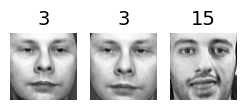

Cluster 9


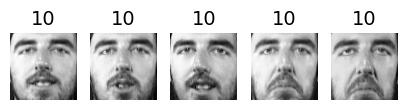

Cluster 10


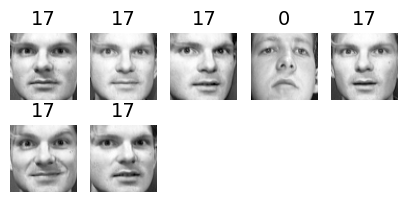

Cluster 11


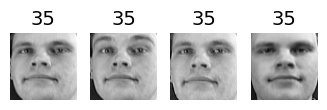

Cluster 12


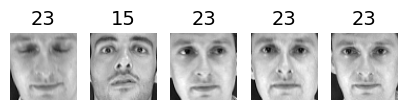

Cluster 13


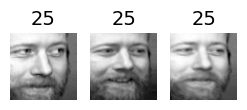

Cluster 14


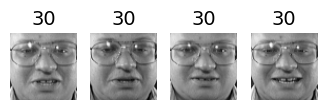

Cluster 15


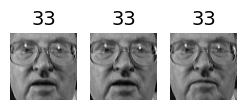

Cluster 16


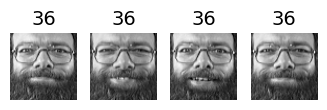

Cluster 17


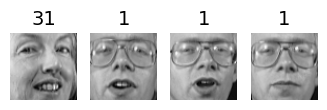

Cluster 18


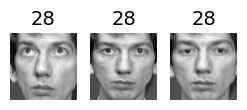

Cluster 19


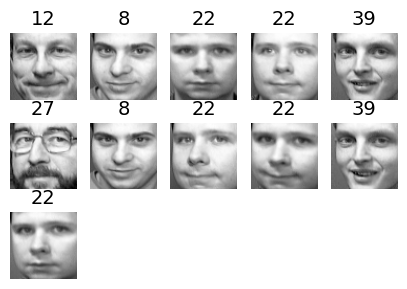

Cluster 20


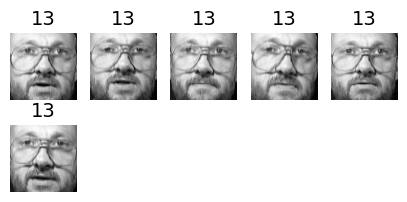

Cluster 21


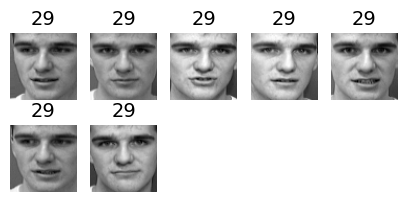

Cluster 22


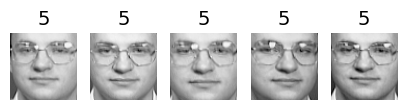

Cluster 23


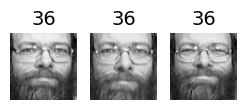

Cluster 24


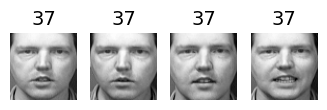

Cluster 25


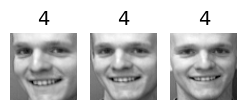

Cluster 26


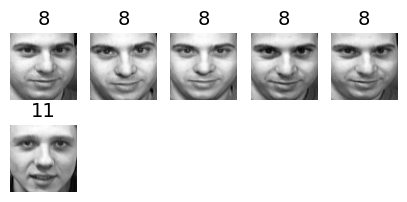

Cluster 27


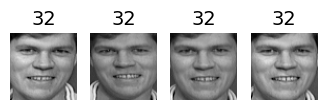

Cluster 28


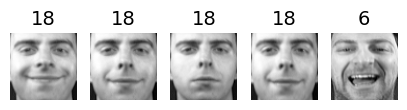

Cluster 29


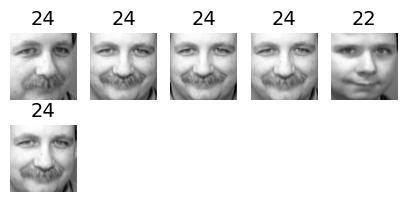

Cluster 30


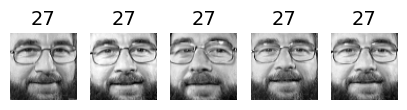

Cluster 31


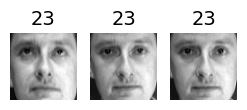

Cluster 32


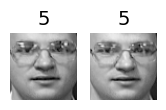

Cluster 33


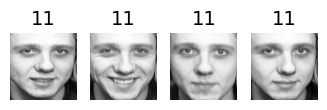

Cluster 34


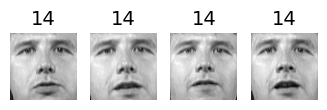

Cluster 35


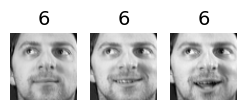

Cluster 36


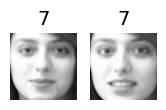

Cluster 37


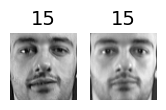

Cluster 38


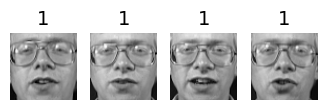

Cluster 39


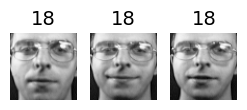

Cluster 40


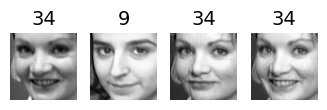

Cluster 41


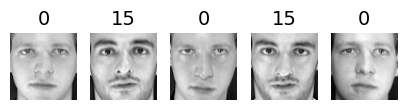

Cluster 42


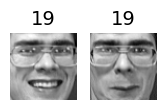

Cluster 43


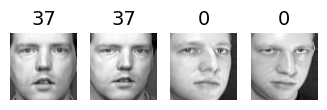

Cluster 44


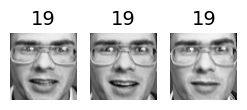

Cluster 45


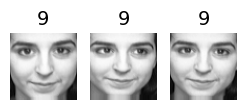

Cluster 46


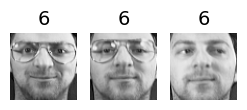

Cluster 47


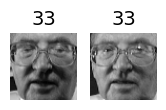

Cluster 48


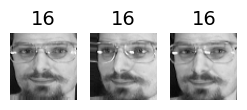

Cluster 49


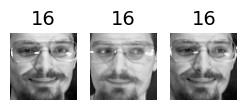

Cluster 50


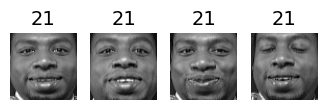

Cluster 51


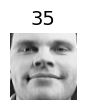

Cluster 52


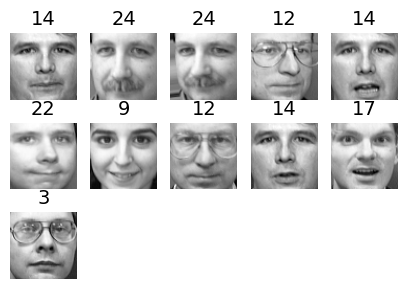

Cluster 53


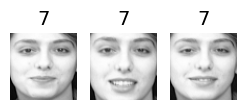

Cluster 54


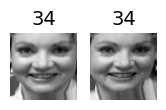

Cluster 55


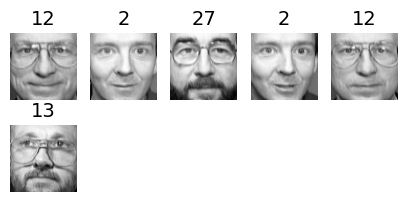

Cluster 56


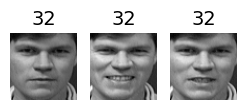

Cluster 57


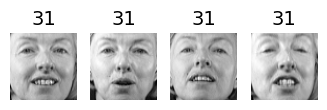

Cluster 58


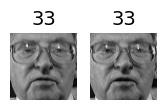

Cluster 59


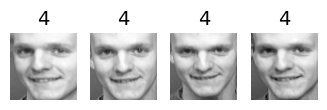

Cluster 60


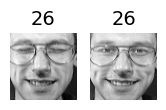

Cluster 61


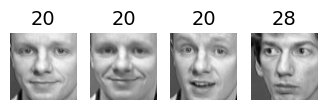

Cluster 62


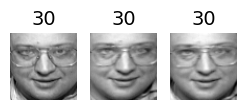

Cluster 63


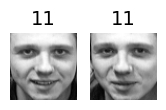

Cluster 64


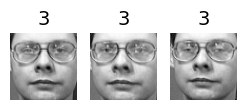

Cluster 65


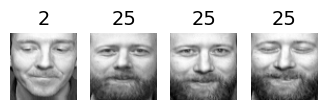

Cluster 66


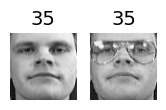

Cluster 67


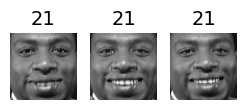

Cluster 68


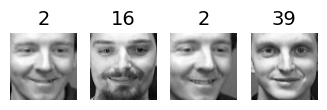

Cluster 69


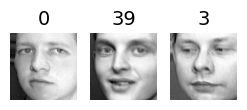

Cluster 70


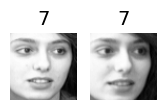

Cluster 71


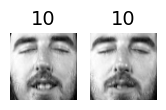

Cluster 72


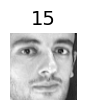

Cluster 73


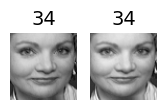

Cluster 74


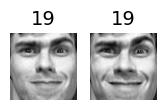

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

About 2 out of 3 clusters are useful: that is, they contain at least 2 pictures, all of the same person. However, the rest of the clusters have either one or more intruders, or they have just a single picture.

Clustering images this way may be too imprecise to be directly useful when training a model (as we will see below), but it can be tremendously useful when labeling images in a new dataset: it will usually make labelling much faster.

## 11. Using Clustering as Preprocessing for Classification

*Exercise: Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.9375

*Exercise: Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set.*

In [ ]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)

clf.score(X_valid_reduced, y_valid)

0.7375

Yikes! That's not better at all! Let's see if tuning the number of clusters helps.

*Exercise: Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach?*

We could use a `GridSearchCV` like we did earlier in this notebook, but since we already have a validation set, we don't need K-fold cross-validation, and we're only exploring a single hyperparameter, so it's simpler to just run a loop manually:

This cell demonstrates how to tune the number of clusters (`n_clusters`) in a K-Means step when using it as a preprocessing technique for a classifier. It constructs a machine learning pipeline and evaluates its performance for various `k` values.

1.  **`for n_clusters in k_range:`**: The code iterates through a predefined range of potential cluster numbers (`k_range`).
2.  **`pipeline = make_pipeline(...)`**: For each `n_clusters` value, a `Pipeline` is created:
    *   `KMeans(n_clusters=n_clusters, random_state=42)`: The first step in the pipeline is a K-Means clustering model. It takes the `X_train_pca` data and reduces its dimensionality by assigning each instance to one of `n_clusters` clusters. (Note: The `transform` method of KMeans is implicitly used here when the pipeline fits and transforms the data for the next step).
    *   `RandomForestClassifier(n_estimators=150, random_state=42)`: The second step is a Random Forest Classifier that will be trained on the output of the K-Means step (e.g., distances to centroids or cluster labels, depending on how `KMeans` is used within the pipeline, though typically `transform` would output distances).
3.  **`pipeline.fit(X_train_pca, y_train)`**: The entire pipeline is trained on the PCA-transformed training data (`X_train_pca`) and its corresponding labels (`y_train`).
4.  **`print(n_clusters, pipeline.score(X_valid_pca, y_valid))`**: The validation accuracy of the trained pipeline is then printed for each `n_clusters` value, allowing for comparison to find the optimal number of clusters that maximizes the classifier's performance on unseen validation data.

In [ ]:
from sklearn.pipeline import make_pipeline

for n_clusters in k_range:
    pipeline = make_pipeline(
        KMeans(n_clusters=n_clusters, random_state=42),
        RandomForestClassifier(n_estimators=150, random_state=42)
    )
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.4
10 0.4375
15 0.5875
20 0.6
25 0.6625
30 0.6625
35 0.6625
40 0.675
45 0.6625
50 0.6875
55 0.75
60 0.6875
65 0.725
70 0.7
75 0.7375
80 0.725
85 0.7625
90 0.775
95 0.775
100 0.7625
105 0.75
110 0.725
115 0.7625
120 0.7625
125 0.7375
130 0.7375
135 0.725
140 0.8
145 0.725


Oh well, even by tuning the number of clusters, we never get beyond 80% accuracy. Looks like the distances to the cluster centroids are not as informative as the original images.

*Exercise: What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?*

This cell creates **extended feature sets** by concatenating the PCA-reduced features with the K-Means transformed features.

*   **`X_train_extended = np.c_[X_train_pca, X_train_reduced]`**: This line horizontally stacks (concatenates) two arrays: `X_train_pca` (the original training data after PCA dimensionality reduction) and `X_train_reduced` (the training data transformed by the K-Means model, typically representing distances to centroids).
*   The same operation is performed for the validation (`X_valid_extended`) and test (`X_test_extended`) sets.

The purpose of this operation is to investigate whether adding information derived from clustering (distances to cluster centroids) as new features can improve the performance of a classifier, in addition to the features obtained through PCA.

In [ ]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [ ]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.85

That's a bit better, but still worse than without the cluster features. The clusters are not useful to directly train a classifier in this case (but they can still help when labelling new training instances).

## 12. A Gaussian Mixture Model for the Olivetti Faces Dataset

*Exercise: Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset's dimensionality (e.g., use PCA, preserving 99% of the variance).*

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

*Exercise: Use the model to generate some new faces (using the `sample()` method), and visualize them (if you used PCA, you will need to use its `inverse_transform()` method).*

This cell demonstrates how to use a trained `GaussianMixture` model to generate new data samples (in this case, faces) and then reconstruct them using the inverse PCA transformation.

1.  **`n_gen_faces = 20`**: Defines the number of new faces to generate.
2.  **`gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)`**: The `sample()` method of the `GaussianMixture` model generates new samples based on the learned Gaussian distributions. It returns:
    *   `gen_faces_reduced`: The generated face samples in the PCA-reduced dimensionality space.
    *   `y_gen_faces`: The cluster labels from which each sample was drawn.
3.  **`gen_faces = pca.inverse_transform(gen_faces_reduced)`**: Since the `GaussianMixture` model was trained on PCA-transformed data (`X_train_pca`), the generated samples are also in that reduced space. To visualize them as actual 64x64 pixel faces, the `inverse_transform()` method of the `pca` object is used to project these reduced-dimension samples back into the original high-dimensional pixel space.

In [ ]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

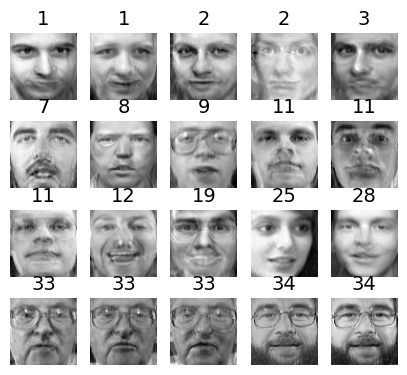

In [ ]:
plot_faces(gen_faces, y_gen_faces)

*Exercise: Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the `score_samples()` method for normal images and for anomalies).*

This cell generates three types of modified face images (rotated, flipped, and darkened) from the training set and then combines them into a single dataset `X_bad_faces` for later use, primarily in anomaly detection exercises. It then plots these modified faces.

1.  **Rotated Faces**: It takes the first `n_rotated` images from `X_train`, reshapes them to their original 64x64 pixel format, transposes them (effectively rotating), and then flattens them back into 1D vectors.
2.  **Flipped Faces**: It takes the first `n_flipped` images from `X_train`, reshapes them, horizontally flips each image using slicing `[::-1]`, and flattens them.
3.  **Darkened Faces**: It takes the first `n_darkened` images from `X_train`, creates a copy, and darkens a central portion of each image by multiplying pixel values by 0.3.
4.  **Combine and Plot**: All these modified images are concatenated into `X_bad_faces`, and their original corresponding labels are combined into `y_bad`. Finally, the `plot_faces` function (defined previously) is used to display these "bad" faces.

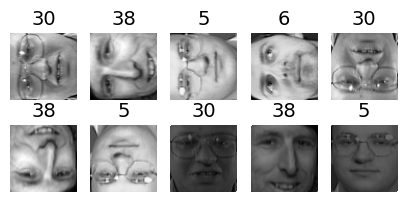

In [ ]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [ ]:
X_bad_faces_pca = pca.transform(X_bad_faces)

This cell calculates the **log-likelihood** of each PCA-transformed "bad face" (`X_bad_faces_pca`) under the previously trained `GaussianMixture` model (`gm`).

*   **`gm.score_samples(X_bad_faces_pca)`**: The `score_samples()` method returns the log of the probability density function (PDF) for each sample. A lower log-likelihood score indicates that the sample is located in a lower-density region according to the GMM, making it more likely to be an anomaly.

This is a direct application of GMM for anomaly detection: instances with significantly lower scores than normal data points are considered anomalous.

In [ ]:
gm.score_samples(X_bad_faces_pca)

array([-1.85962640e+07, -1.73014069e+07, -4.15206950e+07, -4.81260265e+07,
       -3.20479087e+07, -1.35426695e+07, -2.92374146e+07, -9.25148569e+07,
       -1.03272271e+08, -5.41696415e+07])

The bad faces are all considered highly unlikely by the Gaussian Mixture model. Compare this to the scores of some training instances:

In [ ]:
gm.score_samples(X_train_pca[:10])

array([1163.02020928, 1112.17308438, 1156.32132861, 1170.6760286 ,
       1073.6924614 , 1139.89252873, 1113.76630027, 1073.692449  ,
       1048.17522878, 1048.17520762])

## 13. Using Dimensionality Reduction Techniques for Anomaly Detection

*Exercise: Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.*

We already reduced the dataset using PCA earlier:

In [ ]:
X_train_pca.round(2)

array([[ -3.78,   1.85,  -5.14, ...,   0.14,  -0.21,   0.06],
       [-10.15,   1.53,  -0.77, ...,  -0.12,  -0.14,  -0.02],
       [ 10.02,  -2.88,  -0.92, ...,  -0.07,  -0.  ,   0.12],
       ...,
       [ -2.48,  -2.96,   1.3 , ...,   0.02,   0.03,  -0.15],
       [  3.22,  -5.35,   1.39, ...,  -0.06,  -0.23,   0.16],
       [  0.92,   3.65,   2.26, ...,  -0.14,  -0.07,   0.06]],
      dtype=float32)

This cell defines a function named `reconstruction_errors` that calculates the mean squared error (MSE) between the original data and its reconstruction after applying Principal Component Analysis (PCA).

Here's a breakdown of the steps:
1.  **`X_pca = pca.transform(X)`**: The input data `X` is first transformed into its lower-dimensional PCA representation using the `pca.transform()` method.
2.  **`X_reconstructed = pca.inverse_transform(X_pca)`**: The PCA-transformed data (`X_pca`) is then reconstructed back into the original feature space using the `pca.inverse_transform()` method. This reconstructed data is an approximation of the original `X`.
3.  **`mse = np.square(X_reconstructed - X).mean(axis=-1)`**: The difference between the `X_reconstructed` and the original `X` is calculated, squared, and then the mean is taken along the last axis (`axis=-1`). This computes the Mean Squared Error for each instance, representing the reconstruction error. A higher reconstruction error indicates that the instance deviates more from the patterns captured by the PCA model, suggesting it might be an anomaly.
4.  **`return mse`**: The function returns an array of MSE values, one for each instance in the input `X`.

In [ ]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [ ]:
reconstruction_errors(pca, X_train).mean()

np.float32(0.00019205351)

In [ ]:
reconstruction_errors(pca, X_bad_faces).mean()

np.float32(0.004707354)

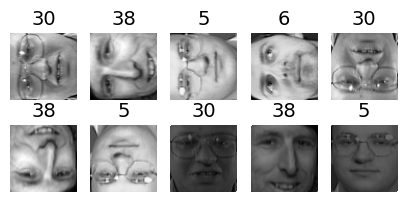

In [ ]:
plot_faces(X_bad_faces, y_bad)

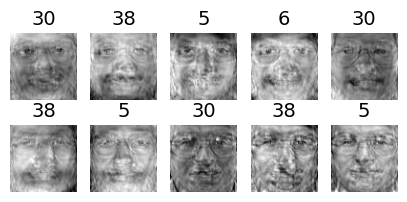

In [ ]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)